## Context

## Objective

- Explore and visualize the dataset.
- Build  models to predict the nutrient adequacy of the household.
- Generate a set of insights from the dataset.

### The key question

Which factors would affect the nutrient adequacy of the household?

### Problem Formulation:

We have a regression problem at hand where we will try to predict the nutrient adequacy of the household based on several factors such as - gender, sector, food price, educational level, etc.

### Proposed approach

Since it is a regression problem we will first start with the parametric model - linear regression and Ridge Regression.

### Overall solution design :

The potential solution design would look like this:

- Checking the data description to get the idea of basic statistics or summary of data.
- Univariate analysis to see how data is spread out, getting to know about the outliers.
- Bivariate analysis to see how different attributes vary with the dependent variable.
- Outlier treatment if needed.
- Missing value treatment using appropriate techniques.
- Feature engineering - transforming features, creating new features if possible.
- Choosing the model evaluation technique - 1) R Squared 2) RMSE can be any other metrics related to regression analysis.
- Splitting the data and proceeding with modeling.
- Model tuning to see if the performance of the model can be improved further.


### Measures of success :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

## Data Dictionary

**hhid** : Household Identification

**hhgender** : RECODE of hhgender (What is the sex of [NAME]?)

**state** : State code

**sector** : Sector

**pricem_fg1** : mean price (Naira/kg) of fg1

**pricem_fg2** : mean price (Naira/kg) of fg2

**pricem_fg3** : mean price (Naira/kg) of fg3

**pricem_fg4** : mean price (Naira/kg) of fg4

**pricem_fg5** : mean price (Naira/kg) of fg5

**pricem_fg6** : mean price (Naira/kg) of fg6

**pricem_fg7** : mean price (Naira/kg) of fg7

**pricem_fg8** : mean price (Naira/kg) of fg8

**pricem_fg9** : mean price (Naira/kg) of fg9

**pricem_fg10** : mean price (Naira/kg) of fg10

**pricem_fg11** : mean price (Naira/kg) of fg11

**pricem_fg12** : mean price (Naira/kg) of fg12

**wt_wave4** : Household cross-section weight

**hh_educ** : What is the highest educational level [NAME] completed?

**hh_qual** : What is [NAME]'s highest qualification attained?

**hhage** : How old is [NAME] (IN COMPLETED YEARS)?

**Matri_statu** : What is [NAME]'s marital status?

**Religion** : What is [NAME]'S main  religion?

**hhsize** : hhsize

**hhsize_eqdul** : hhsize_eqdul

**hhame** : hhame

**popw** : Population weight

**HNA_kcal** : household nutrient adequacy in kcal

**HNA_cal** : household nutrient adequacy in cal

**HNA_pro** : household nutrient adequacy in pro

**HNA_iron** : household nutrient adequacy in iron

**HNA_zinc** : household nutrient adequacy in zinc

**HNA_fola** : household nutrient adequacy in fola

**HNA_vib12** : household nutrient adequacy in vib12

**HNA_via** : household nutrient adequacy in via

**HNA_nia** : household nutrient adequacy in nia

**HNA_ribo** : household nutrient adequacy in ribo

**HNA_thia** : household nutrient adequacy in thia

**HNA_vitc** : household nutrient adequacy in vitc

**HNA_vitb6** : household nutrient adequacy in vitb6

**food_exp** : total annual food expenditure (Naira)

**nonfood_exp** : total annual non food expenditure (Naira)



The target variables are **HNA_kcal**, **HNA_cal**, **HNA_pro**, **HNA_iron**, **HNA_zinc**, **HNA_fola**, **HNA_vib12**, **HNA_via**, **HNA_nia**, **HNA_ribo**, **HNA_thia**, **HNA_vitc**, **HNA_vitb6**.

## Importing the necessary libraries and overview of the dataset

In [1]:
# Importing the basic libraries we will require for the project

# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')
# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)

## Loading the data

In [2]:
# Loading the dataset .
data=pd.read_excel("C:/Users/AHema/OneDrive/2023/Machine learning for nutrient adequacy/data/Nigeria/Nigeria_nutrient_data_final_machinelearning.xlsx",sheet_name='Nigeria_nutrient_data_final')

In [3]:
# See variables in the dataset
data.head()

hhid hhgender           zone    state sector  pricem_fg1  pricem_fg2  \
0   59018     Male     North East   Bauchi  Rural  122.800148   10.000000   
1  360081     Male     North West  Zamfara  Rural  189.098259   23.489933   
2  319026     Male  North Central  Plateau  Rural  177.779235   52.173914   
3  189194     Male     North West   Kaduna  Rural  156.770639   66.666668   
4  330031     Male     North West   Sokoto  Rural  123.267599   68.433385   

   pricem_fg3  pricem_fg4  pricem_fg5  pricem_fg6  pricem_fg7   pricem_fg8  \
0   77.037832  389.821200  551.724144   98.039215  255.827557  1002.631470   
1  114.642382  349.514553  477.777778   51.202639  192.975529  1200.000000   
2   62.093536  532.838227  493.057759   35.087720  161.864642  1211.829870   
3   16.149520  300.452343  588.788922   34.802785  147.629911   361.111121   
4   18.427710  419.624514  621.621629   85.532301  147.518816   720.532166   

    pricem_fg9  pricem_fg10  pricem_fg11  pricem_fg12      wt_wave4  \
0   777.949966   429.781493   622.281795   412.384629   1514.764526   
1   175.000000   309.969267   282.352942   285.714291   5530.672852   
2  3043.427987   277.777767  1595.367169   100.939274  16607.695312   
3   697.841833   338.283730   440.073326   121.143980   2228.435303   
4   811.411762   578.809118   199.965779    33.902372   5143.343262   

                     hh_educ  \
0  SENIOR SECONDARY 3 (SS 3)   
1                   QUARANIC   
2                  PRIMARY 4   
3                   QUARANIC   
4                  PRIMARY 6   

                                             hh_qual  hhage  \
0  SENIOR SECONDARY SCHOOL CERTIFICATE (SSS) /  ‘...     40   
1                                               NONE     50   
2                                               NONE     51   
3                                               NONE     55   
4            FIRST SCHOOL LEAVING CERTIFICATE (FSLC)     51   

            Matri_statu      Religion  hhsize  hhsize_eqdul     hhame  \
0  MARRIED (MONOGAMOUS)           NaN       6           3.7  3.549180   
1  MARRIED (POLYGAMOUS)           NaN      13           7.4  7.918033   
2  MARRIED (MONOGAMOUS)  CHRISTIANITY       9           7.6  8.073771   
3  MARRIED (POLYGAMOUS)           NaN      13           7.9  8.749508   
4  MARRIED (MONOGAMOUS)           NaN      11           7.7  8.426229   

            popw    HNA_kcal    HNA_cal  HNA_pro    HNA_iron    HNA_zinc  \
0    9088.586914   85.917156  22.366785    100.0  100.000000   84.752561   
1   82960.093750  100.000000  42.803978    100.0   87.197614   65.498550   
2  149469.250000   95.668835  29.256851    100.0   82.187611   87.959585   
3   28969.658203  100.000000  37.594024    100.0  100.000000  100.000000   
4   56576.777344   80.624220  40.768269    100.0   99.328055   92.805168   

   HNA_fola  HNA_vib12  HNA_via    HNA_nia   HNA_ribo    HNA_thia    HNA_vitc  \
0     100.0   0.792786    100.0  71.390989  49.494825  100.000000   28.216889   
1     100.0  32.869956    100.0  66.835600  70.729082   88.336349  100.000000   
2     100.0  55.555783    100.0  94.246316  50.640916  100.000000  100.000000   
3     100.0  22.993214    100.0  69.063494  47.672930  100.000000  100.000000   
4     100.0  99.813613    100.0  66.892462  52.933465   84.862476  100.000000   

    HNA_vitb6       food_exp    nonfood_exp  
0   95.746063  146386.259726  114373.652405  
1   85.147603  439177.090949  199834.437710  
2  100.000000  739587.904208  238253.237999  
3  100.000000  436028.797041  189025.127014  
4   78.195534  494925.378111  214679.306458

## Check the data types of the columns for the dataset

In [4]:
# Checking info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hhid          5024 non-null   int64  
 1   hhgender      5024 non-null   object 
 2   zone          5024 non-null   object 
 3   state         5024 non-null   object 
 4   sector        5024 non-null   object 
 5   pricem_fg1    5024 non-null   float64
 6   pricem_fg2    5024 non-null   float64
 7   pricem_fg3    5024 non-null   float64
 8   pricem_fg4    5024 non-null   float64
 9   pricem_fg5    5024 non-null   float64
 10  pricem_fg6    5024 non-null   float64
 11  pricem_fg7    5024 non-null   float64
 12  pricem_fg8    5024 non-null   float64
 13  pricem_fg9    5024 non-null   float64
 14  pricem_fg10   5024 non-null   float64
 15  pricem_fg11   5024 non-null   float64
 16  pricem_fg12   5024 non-null   float64
 17  wt_wave4      5021 non-null   float64
 18  hh_educ       3774 non-null 

**Observations**:

Let's check the unique values in each column

In [5]:
# Checking unique values in each column
data.nunique()

hhid            5024
hhgender           2
zone               6
state             37
sector             2
pricem_fg1      4903
pricem_fg2      2805
pricem_fg3      4281
pricem_fg4      4421
pricem_fg5      4453
pricem_fg6      2984
pricem_fg7      4991
pricem_fg8      4467
pricem_fg9      1824
pricem_fg10     3434
pricem_fg11     4713
pricem_fg12     2245
wt_wave4         520
hh_educ           33
hh_qual           13
hhage             85
Matri_statu        7
Religion           3
hhsize            26
hhsize_eqdul     127
hhame           1617
popw            3113
HNA_kcal        2895
HNA_cal         4756
HNA_pro         1540
HNA_iron        3292
HNA_zinc        3243
HNA_fola        1382
HNA_vib12       2333
HNA_via          226
HNA_nia         3318
HNA_ribo        4619
HNA_thia        1986
HNA_vitc        1120
HNA_vitb6       2185
food_exp        5024
nonfood_exp     4976
dtype: int64

Observations:

Let's drop the columns mentioned above and define lists for numerical and categorical columns to explore them separately.

In [6]:
# Dropping the columns 
data =data.drop(['hhid',],axis=1)

Let's us check duplicated observations.

In [7]:
data[data.duplicated()]

Empty DataFrame
Columns: [hhgender, zone, state, sector, pricem_fg1, pricem_fg2, pricem_fg3, pricem_fg4, pricem_fg5, pricem_fg6, pricem_fg7, pricem_fg8, pricem_fg9, pricem_fg10, pricem_fg11, pricem_fg12, wt_wave4, hh_educ, hh_qual, hhage, Matri_statu, Religion, hhsize, hhsize_eqdul, hhame, popw, HNA_kcal, HNA_cal, HNA_pro, HNA_iron, HNA_zinc, HNA_fola, HNA_vib12, HNA_via, HNA_nia, HNA_ribo, HNA_thia, HNA_vitc, HNA_vitb6, food_exp, nonfood_exp]
Index: []

**Observations**:
No duplicate observations.

## Exploratory Data Analysis

Now that we have an understanding of the business problem we want to solve, and we have loaded the datasets, the next step to follow is to have a better understanding of the dataset, i.e., what is the distribution of the variables, what are different relationships that exist between variables, etc. If there are any data anomalies like missing values or outliers, how do we treat them to prepare the dataset for building the predictive model?

Let's check the percentage of missing values using the below code.

In [8]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2),'# of Missing Values':data.isna().sum()}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values  # of Missing Values
Religion                    81.45                 4092
hh_qual                     24.88                 1250
hh_educ                     24.88                 1250
popw                         0.98                   49
wt_wave4                     0.06                    3
hhsize_eqdul                 0.00                    0
hhame                        0.00                    0
HNA_kcal                     0.00                    0
HNA_cal                      0.00                    0
HNA_pro                      0.00                    0
HNA_iron                     0.00                    0
hhgender                     0.00                    0
HNA_fola                     0.00                    0
HNA_vib12                    0.00                    0
HNA_via                      0.00                    0
HNA_nia                      0.00                    0
HNA_ribo                     0.00                    0
HNA_thia                     0.00                    0
HNA_vitc                     0.00                    0
HNA_vitb6                    0.00                    0
food_exp                     0.00                    0
HNA_zinc                     0.00                    0
Matri_statu                  0.00                    0
hhsize                       0.00                    0
zone                         0.00                    0
state                        0.00                    0
sector                       0.00                    0
pricem_fg1                   0.00                    0
pricem_fg2                   0.00                    0
pricem_fg3                   0.00                    0
pricem_fg4                   0.00                    0
pricem_fg5                   0.00                    0
pricem_fg6                   0.00                    0
pricem_fg7                   0.00                    0
pricem_fg8                   0.00                    0
pricem_fg9                   0.00                    0
pricem_fg10                  0.00                    0
pricem_fg11                  0.00                    0
pricem_fg12                  0.00                    0
hhage                        0.00                    0
nonfood_exp                  0.00                    0

**Observations**:

In [9]:
#nutrient adequacy 
nutrient_adequacy_cols = ['HNA_kcal',
'HNA_cal',
'HNA_pro',
'HNA_iron',
'HNA_zinc',
'HNA_fola',
'HNA_vib12',
'HNA_via',
'HNA_nia',
'HNA_ribo',
'HNA_thia',
'HNA_vitc',
'HNA_vitb6'
]
#food price
food_price_cols = ['pricem_fg1',
'pricem_fg2',
'pricem_fg3',
'pricem_fg4',
'pricem_fg5',
'pricem_fg6',
'pricem_fg7',
'pricem_fg8',
'pricem_fg9',
'pricem_fg10',
'pricem_fg11',
'pricem_fg12'
]


#income/expenditure
expenditure_cols = ['food_exp','nonfood_exp']

#households attributes and location attributes
categorical_cols = ['hhgender',
'state',
'sector',
'hh_educ',
'hh_qual',
'Matri_statu',
'Religion']
#households attributes and location attributes
other = ['wt_wave4',
'hhage',
'hhsize',
'hhsize_eqdul',
'hhame',
'popw']

## Univariate analysis

Let us now start exploring the dataset, by performing univariate analysis of the dataset, i.e., analyzing/visualizing the dataset by taking one variable at a time. Data visualization is a very important skill to have and we need to decide what charts to plot to better understand the data. For example, what chart makes sense to analyze categorical variables or what charts are suited for numerical variables, and also it depends on what relationship between variables we want to show.

### Univariate analysis for numeric variables

Summary Statistics

In [10]:
data.describe().T

count           mean            std          min  \
pricem_fg1    5024.0     269.466011     116.023149    51.036030   
pricem_fg2    5024.0     387.658822     193.063548    10.000000   
pricem_fg3    5024.0     135.140684      78.640436    10.000000   
pricem_fg4    5024.0     429.550904     170.043231   118.694366   
pricem_fg5    5024.0     552.439919     121.667033   145.454547   
pricem_fg6    5024.0     125.113460      91.685069    11.600928   
pricem_fg7    5024.0     276.335843     121.768930    29.796161   
pricem_fg8    5024.0     961.194186     378.990494    85.387756   
pricem_fg9    5024.0    2094.213178    1044.783656    11.764705   
pricem_fg10   5024.0    1159.195654     843.199758    76.311603   
pricem_fg11   5024.0     916.251864     698.185338    28.000000   
pricem_fg12   5024.0     125.198510     122.340079    10.000000   
wt_wave4      5021.0    5431.990559    5569.161278   400.000000   
hhage         5024.0      49.929936      15.419138    17.000000   
hhsize        5024.0       5.694068       3.463262     1.000000   
hhsize_eqdul  5024.0       3.981310       2.305979     0.700000   
hhame         5024.0       4.187120       2.530773     0.688525   
popw          4975.0   29952.807700   41668.094016   400.000000   
HNA_kcal      5024.0      82.233830      21.051145     0.000000   
HNA_cal       5024.0      44.283747      23.361680     1.392857   
HNA_pro       5024.0      92.165819      15.832279     0.000000   
HNA_iron      5024.0      74.088795      25.338336     0.000000   
HNA_zinc      5024.0      75.738581      24.414406     0.000000   
HNA_fola      5024.0      92.284552      16.522964     0.000000   
HNA_vib12     5024.0      74.368408      34.056973     0.000000   
HNA_via       5024.0      98.363017       9.700497     0.000000   
HNA_nia       5024.0      76.669025      23.545312     0.000000   
HNA_ribo      5024.0      50.362506      24.653934     0.000000   
HNA_thia      5024.0      89.007481      18.132638     0.000000   
HNA_vitc      5024.0      89.675375      23.212592     0.000000   
HNA_vitb6     5024.0      87.056774      19.842424     0.000000   
food_exp      5024.0  411802.875317  259139.150154  4483.184351   
nonfood_exp   5024.0  354541.165495  371510.647307     0.000000   

                        25%            50%            75%           max  
pricem_fg1       185.876830     243.777812     336.932793  2.627917e+03  
pricem_fg2       263.157898     354.045397     447.676207  3.333333e+03  
pricem_fg3        89.297708     129.440730     170.072600  2.527149e+03  
pricem_fg4       341.880354     408.348013     481.660279  3.333333e+03  
pricem_fg5       499.999995     539.716769     588.102692  3.858391e+03  
pricem_fg6        80.857388     107.319727     145.372894  3.042011e+03  
pricem_fg7       206.147749     254.410400     318.159651  2.133431e+03  
pricem_fg8       738.344878     952.046036    1140.720627  6.666667e+03  
pricem_fg9      1508.700240    2300.185956    2641.292371  8.333333e+03  
pricem_fg10      477.662263     880.195563    1672.163399  7.000000e+03  
pricem_fg11      301.125435     714.141052    1396.913701  4.277323e+03  
pricem_fg12       29.330163      94.190544     182.281193  1.867068e+03  
wt_wave4        2096.064453    3708.198242    6691.118652  4.200509e+04  
hhage             38.000000      49.000000      60.000000  1.300000e+02  
hhsize             3.000000       5.000000       7.000000  2.900000e+01  
hhsize_eqdul       2.400000       3.700000       5.200000  1.950000e+01  
hhame              2.400492       3.735410       5.516394  2.111016e+01  
popw            7573.499268   16498.113281   35556.025391  5.275744e+05  
HNA_kcal          67.506942      91.725336     100.000000  1.000000e+02  
HNA_cal           26.909717      38.909264      56.824634  1.000000e+02  
HNA_pro           92.780459     100.000000     100.000000  1.000000e+02  
HNA_iron          52.935459      78.055648     100.000000  1.000000e+02  
HNA_zinc          56.389605      8

Observations:

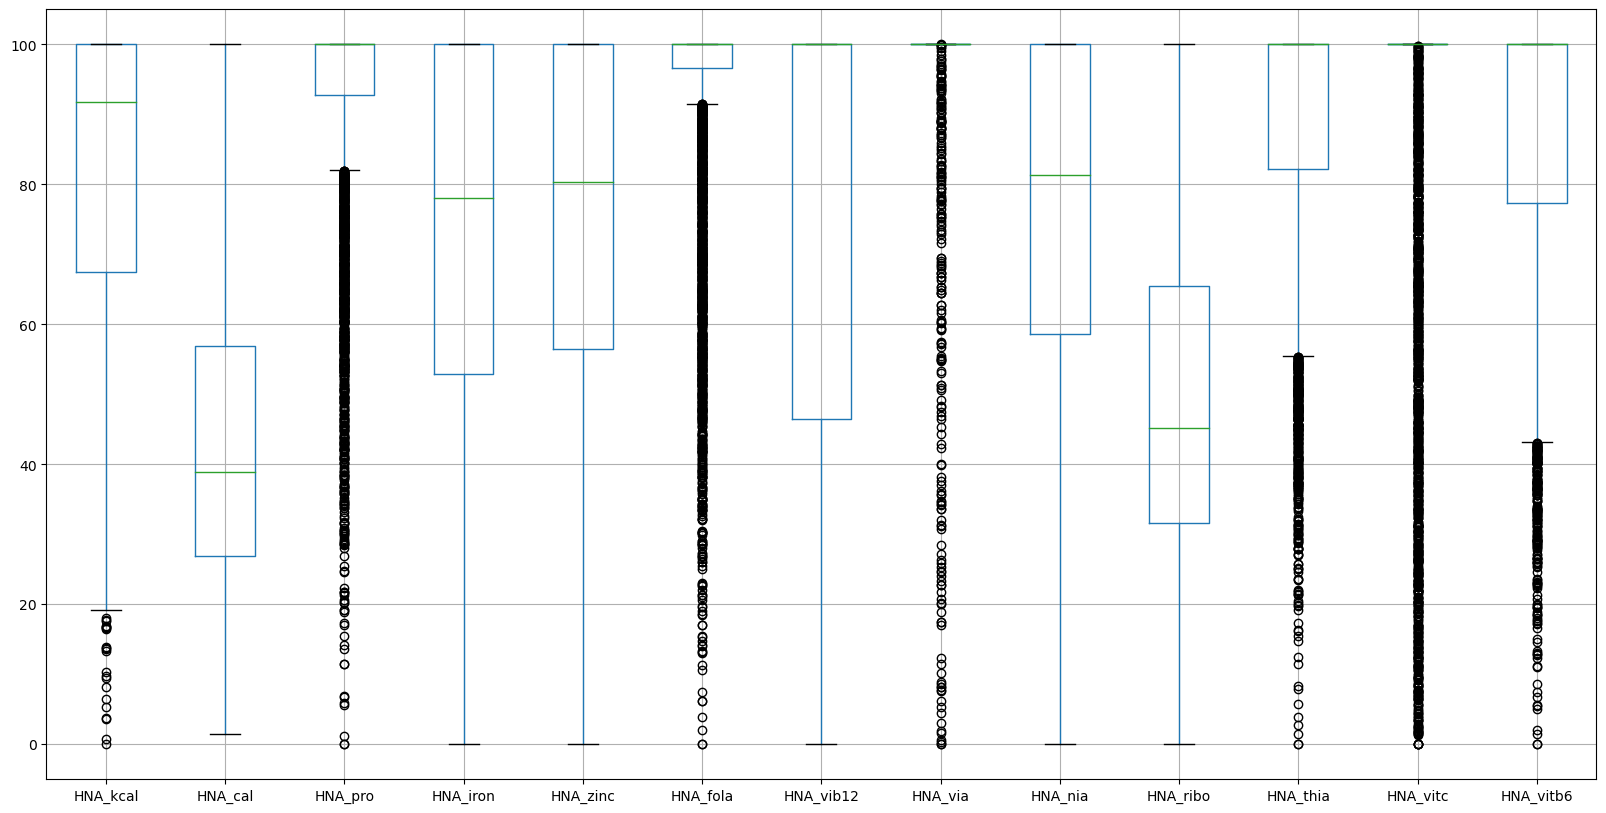

In [11]:
data[nutrient_adequacy_cols].boxplot(figsize=(20,10))
plt.show()


**Observation**:

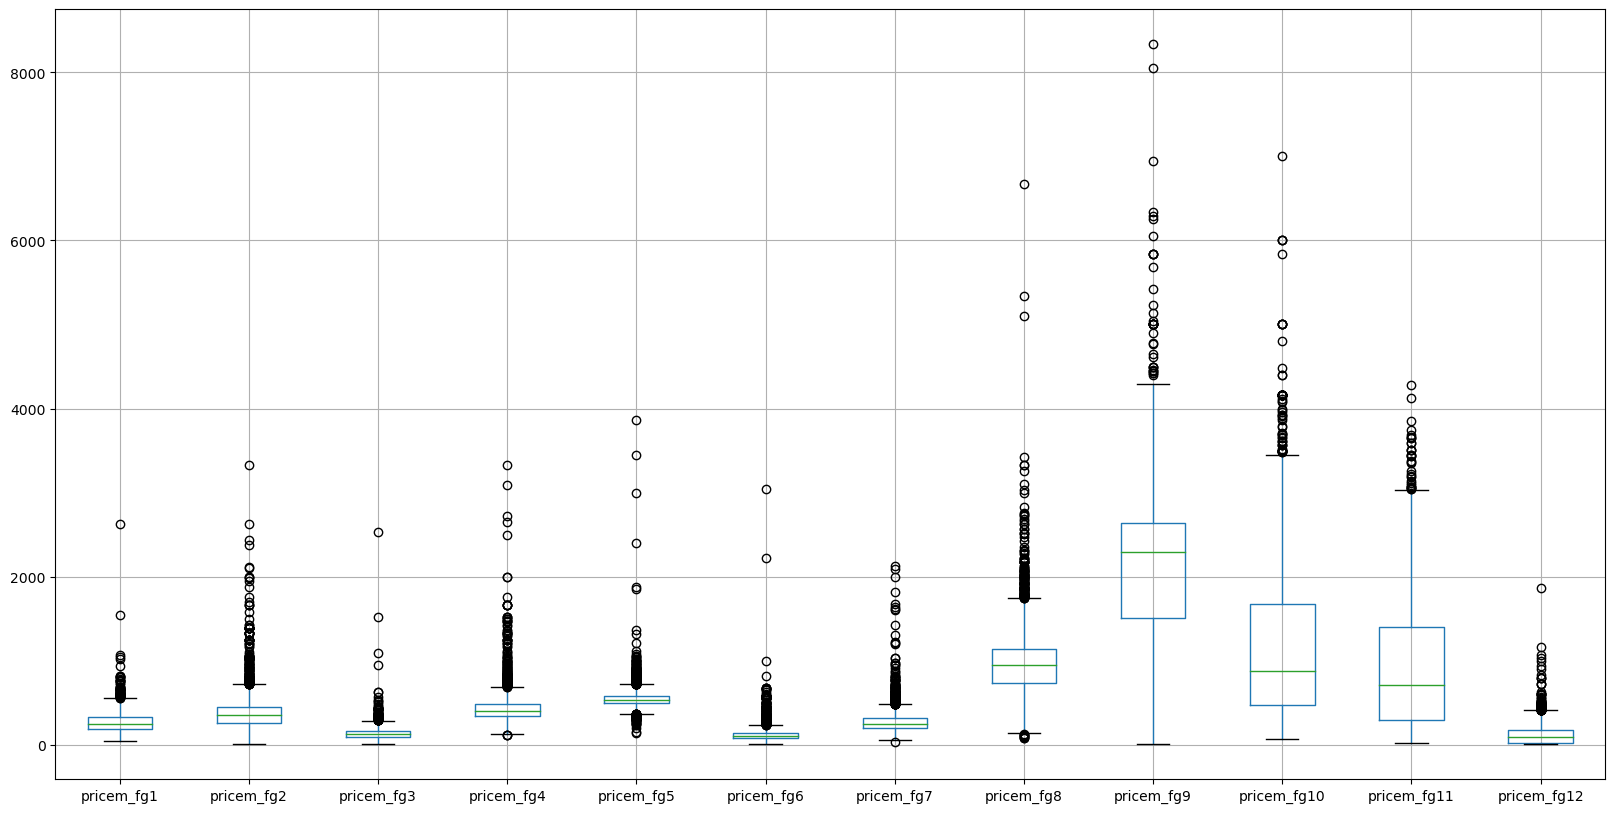

In [12]:
data[food_price_cols].boxplot(figsize=(20,10))
plt.show()

**Observation**:

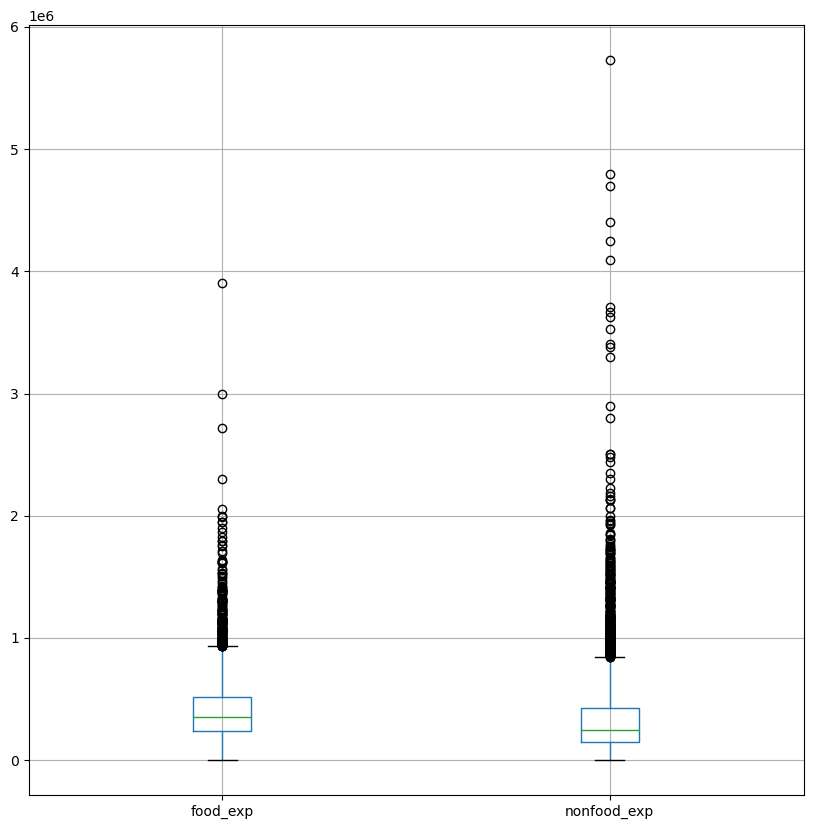

In [13]:
data[expenditure_cols].boxplot(figsize=(10,10))
plt.show()

**Observation**:

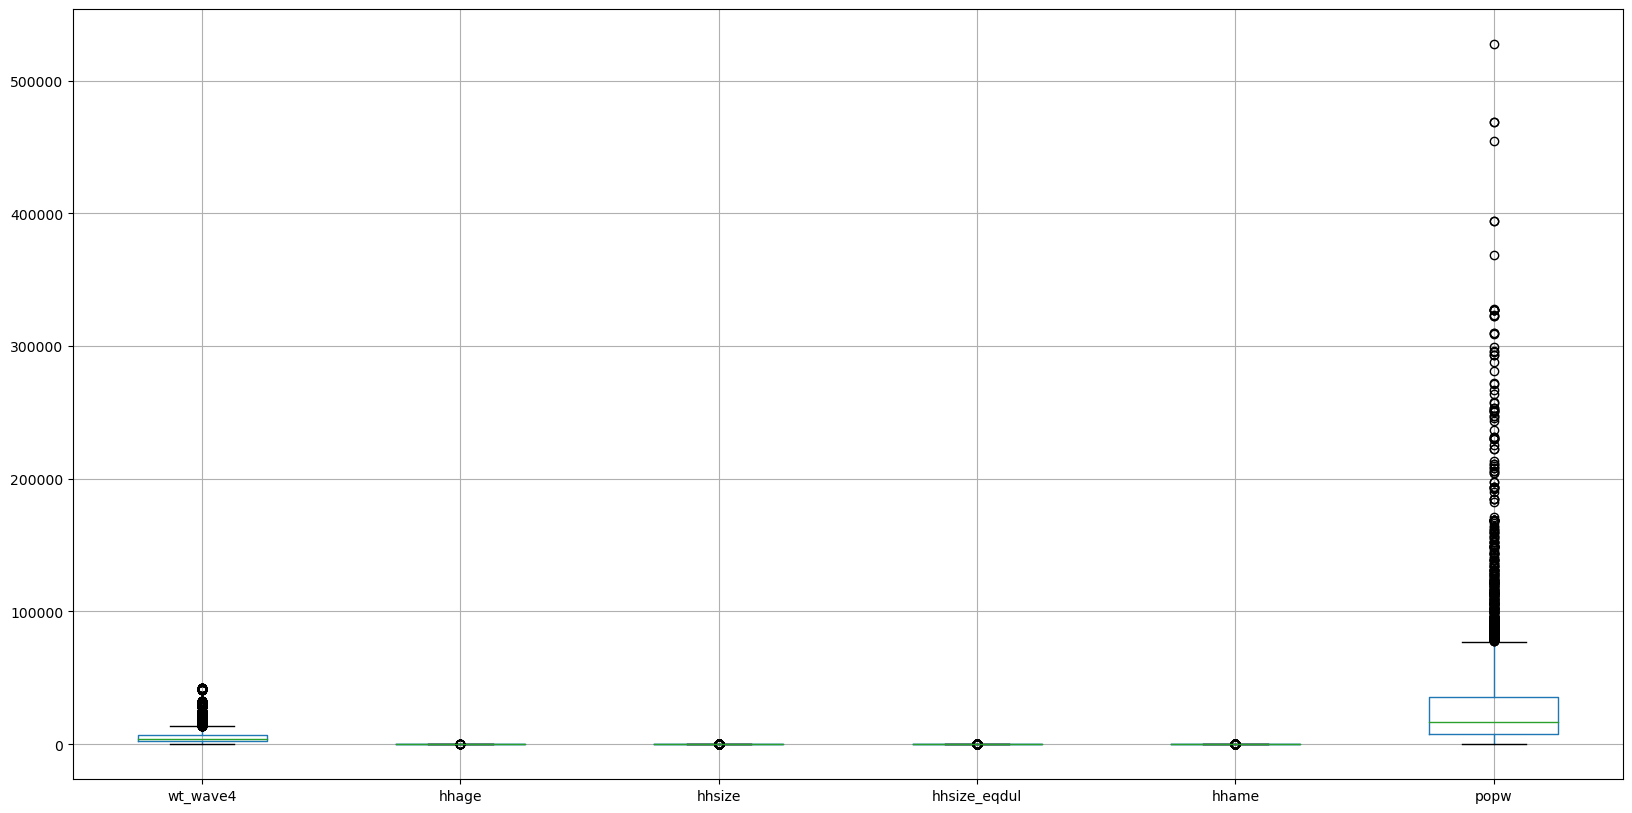

In [14]:
data[other].boxplot(figsize=(20,10))
plt.show()


Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data.

HNA_kcal
Skew : -0.98


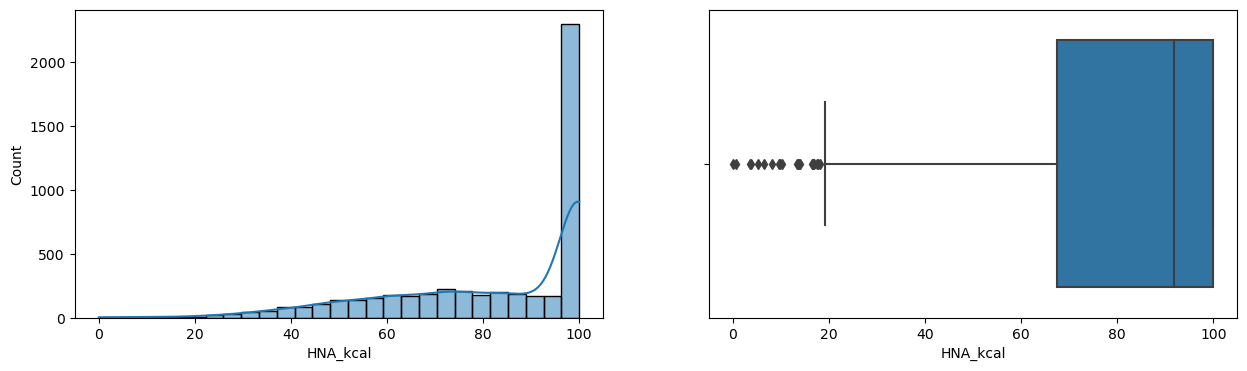

HNA_cal
Skew : 0.87


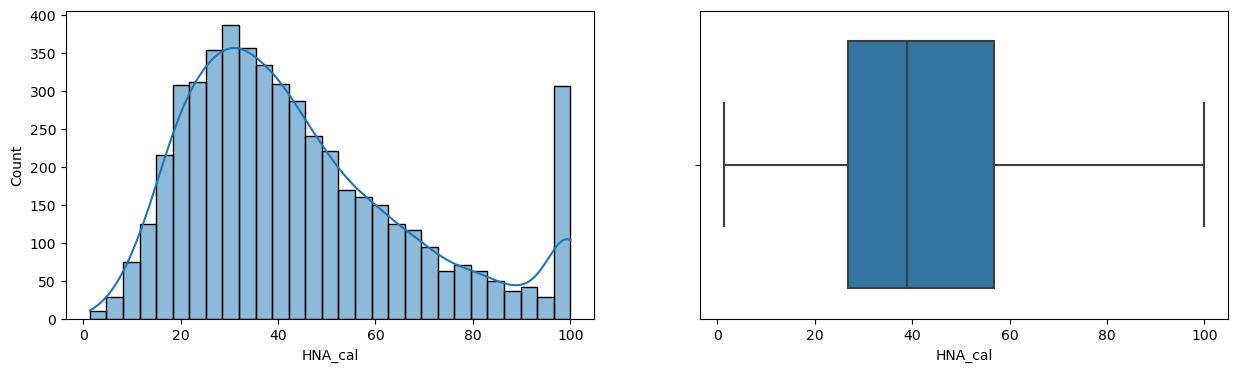

HNA_pro
Skew : -2.33


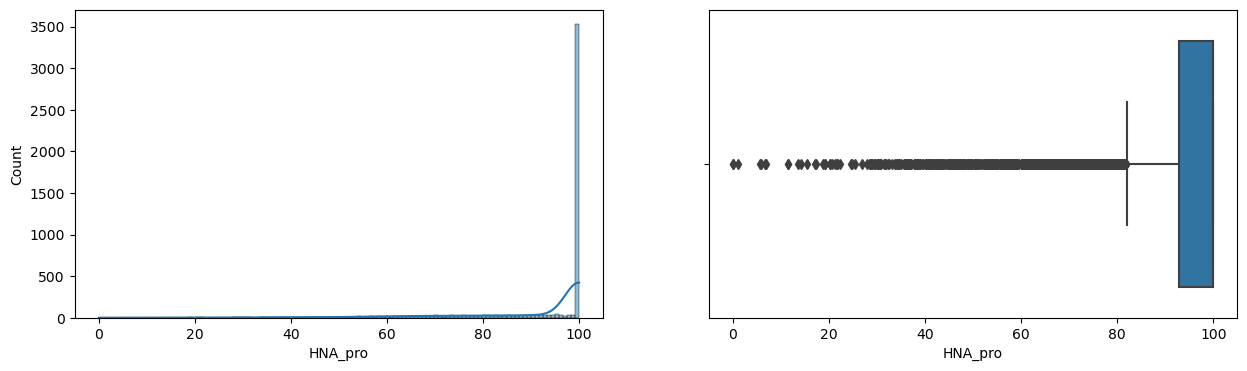

HNA_iron
Skew : -0.5


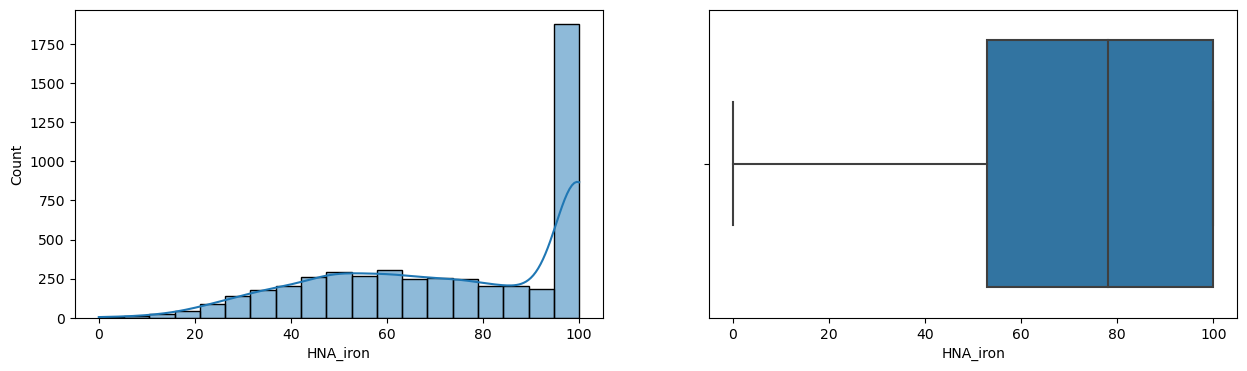

HNA_zinc
Skew : -0.58


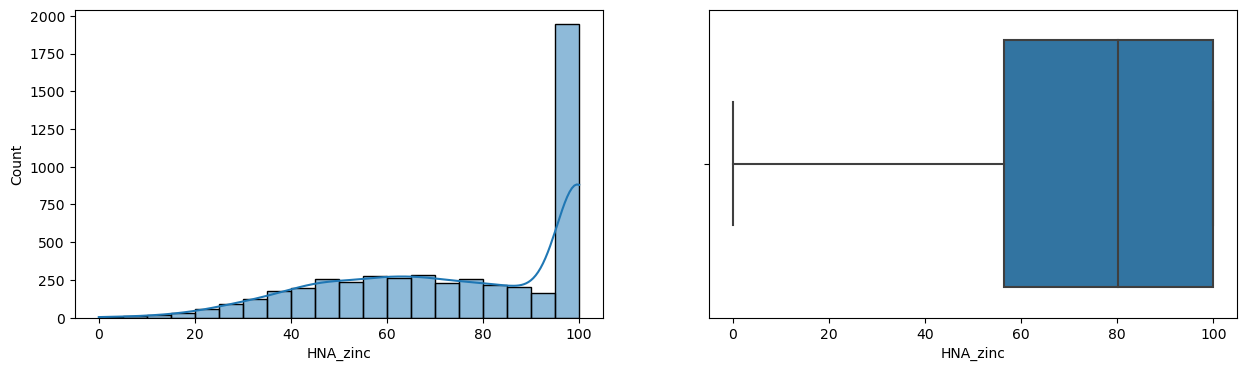

HNA_fola
Skew : -2.41


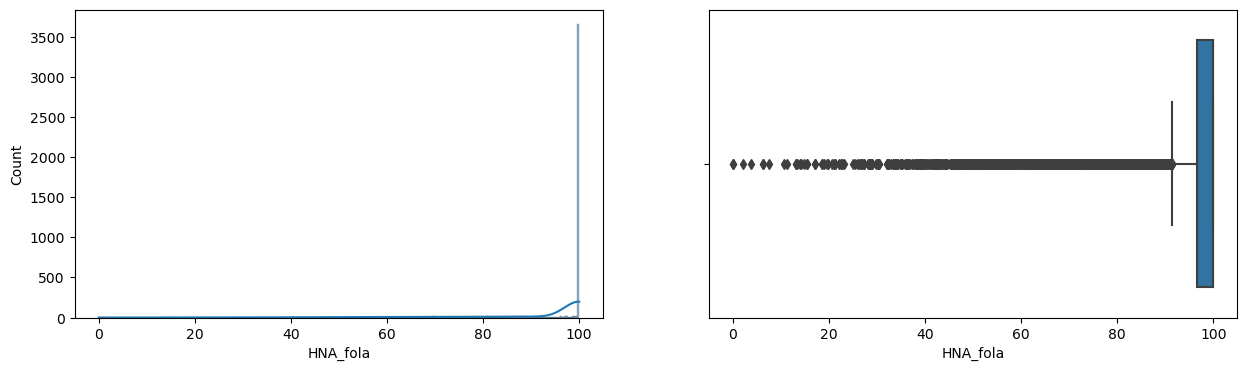

HNA_vib12
Skew : -0.92


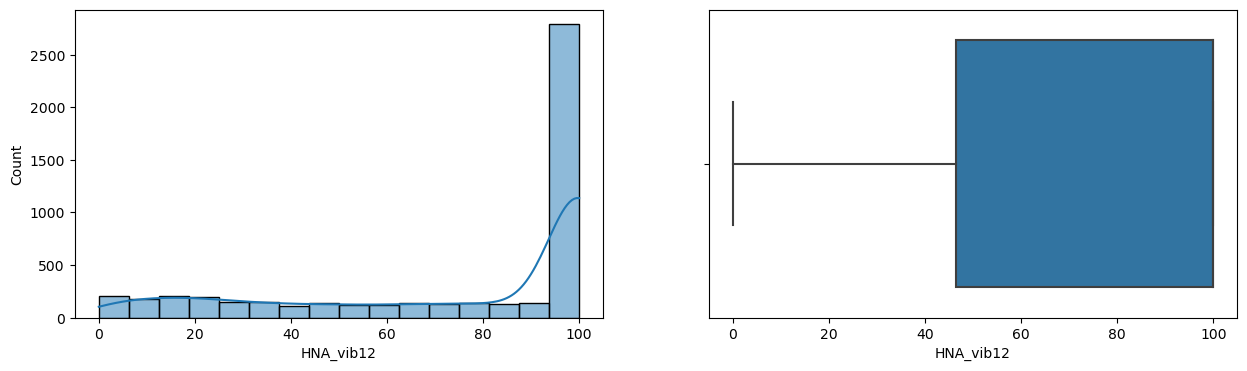

HNA_via
Skew : -7.1


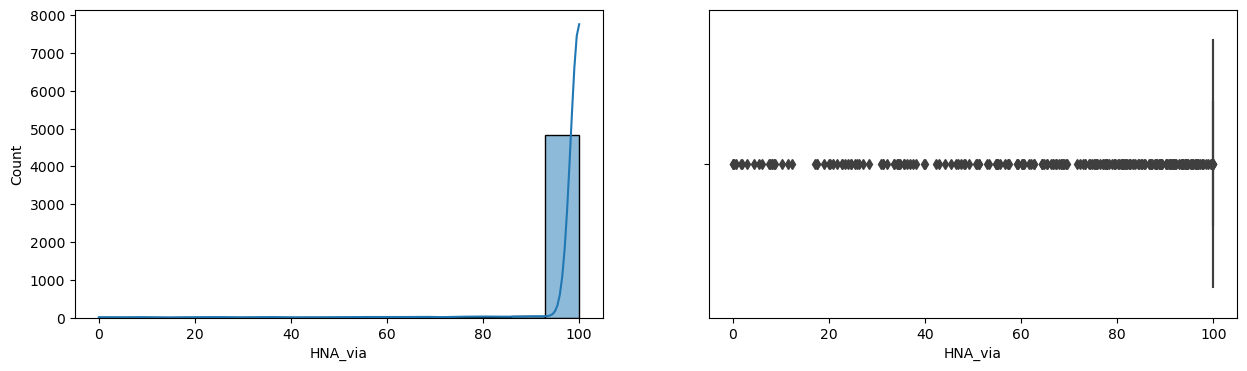

HNA_nia
Skew : -0.65


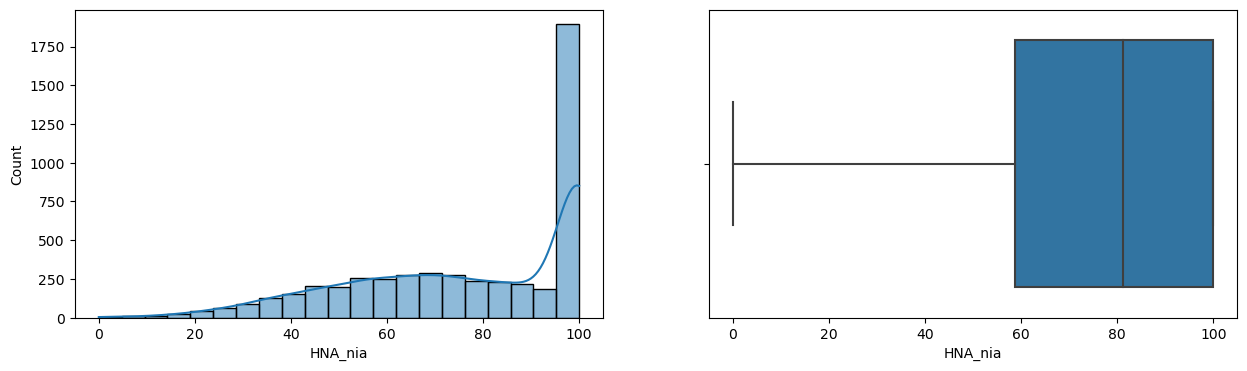

HNA_ribo
Skew : 0.61


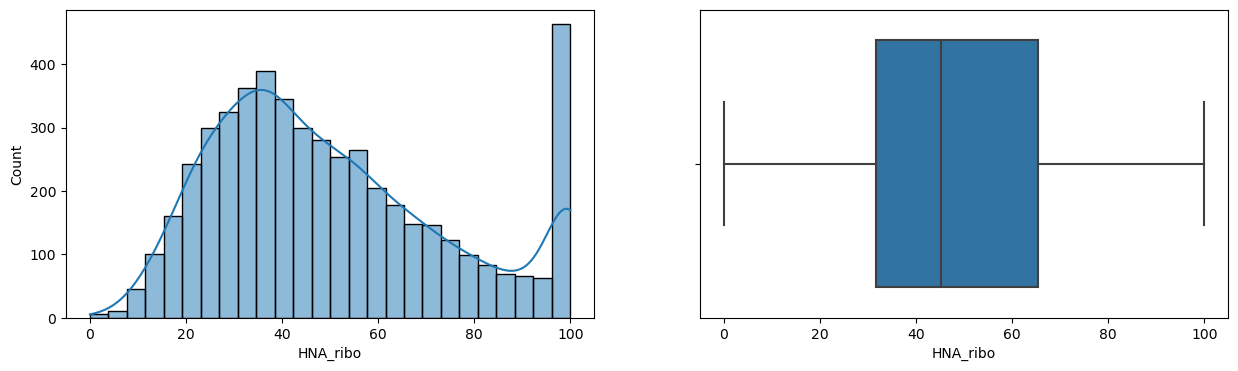

HNA_thia
Skew : -1.73


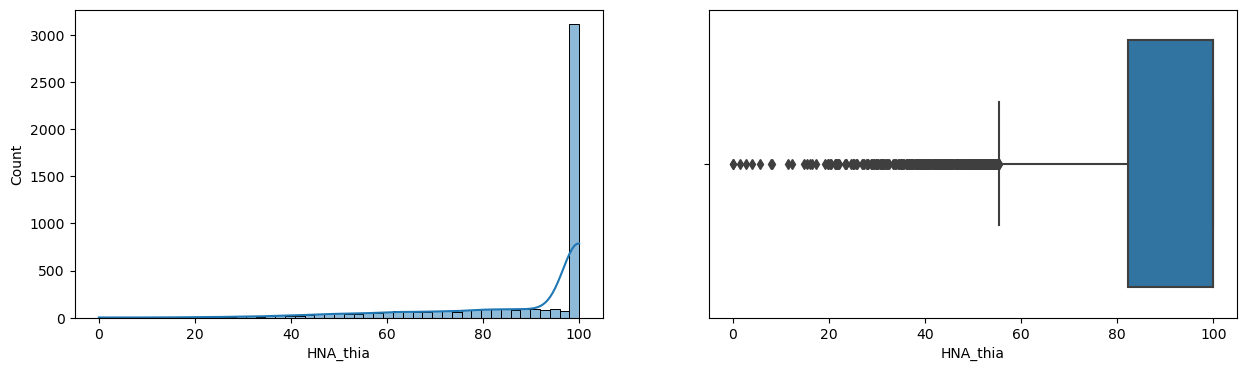

HNA_vitc
Skew : -2.26


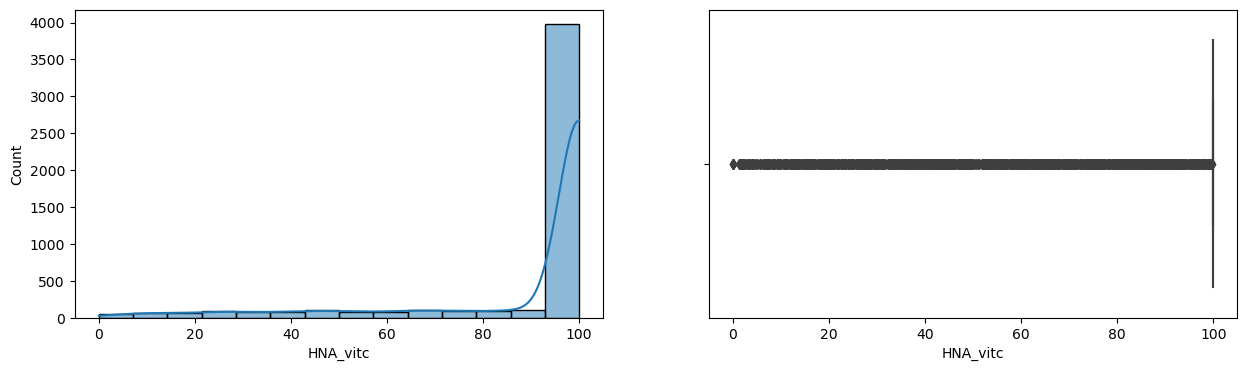

HNA_vitb6
Skew : -1.53


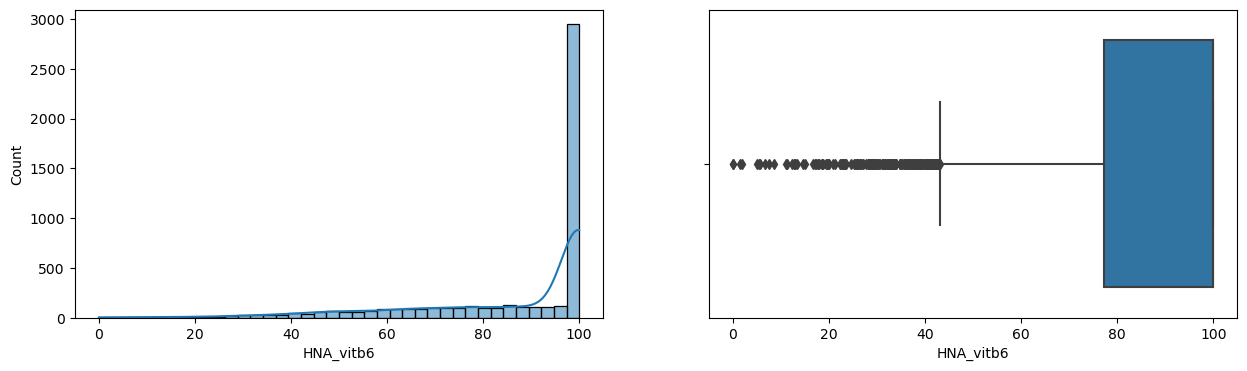

In [15]:
for col in nutrient_adequacy_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(data = data, x = data[col], kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

pricem_fg1
Skew : 2.95


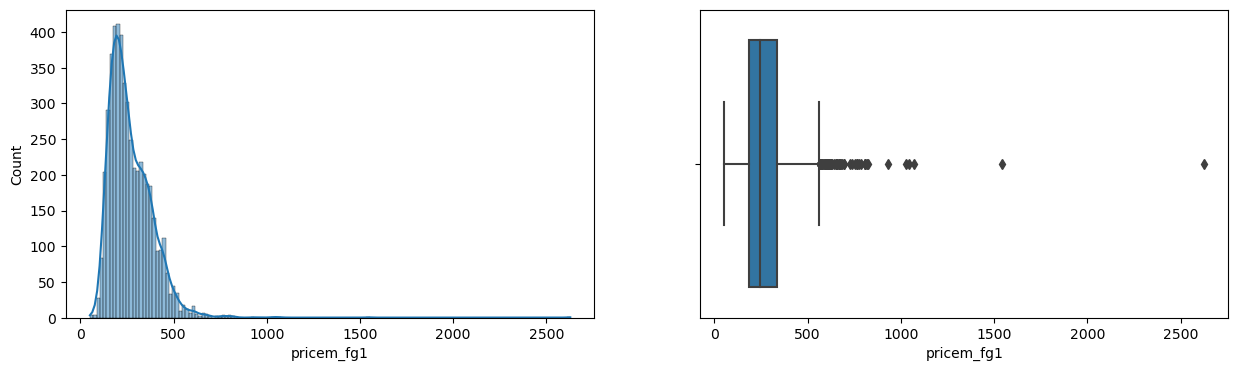

pricem_fg2
Skew : 3.67


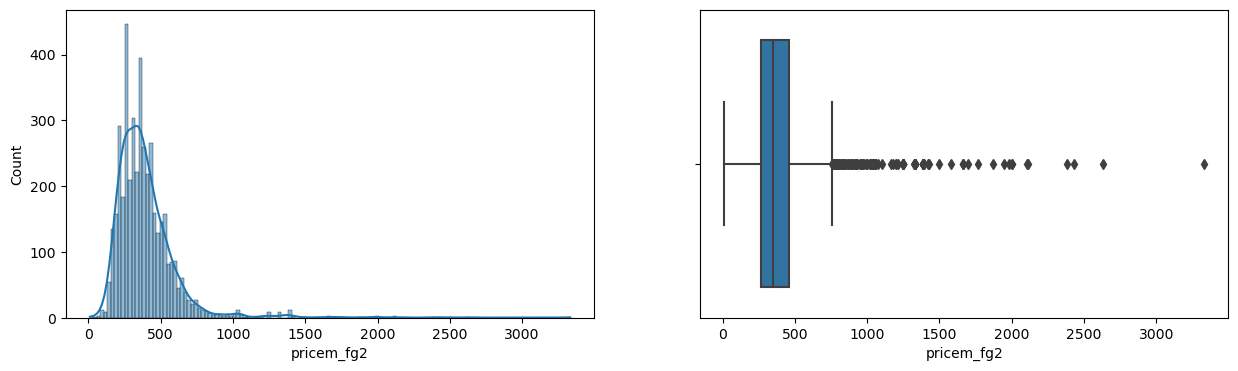

pricem_fg3
Skew : 7.73


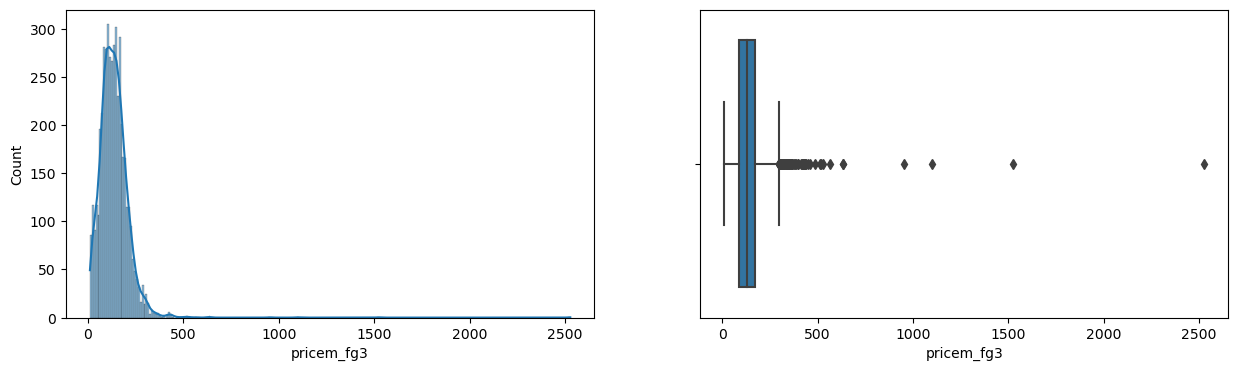

pricem_fg4
Skew : 5.08


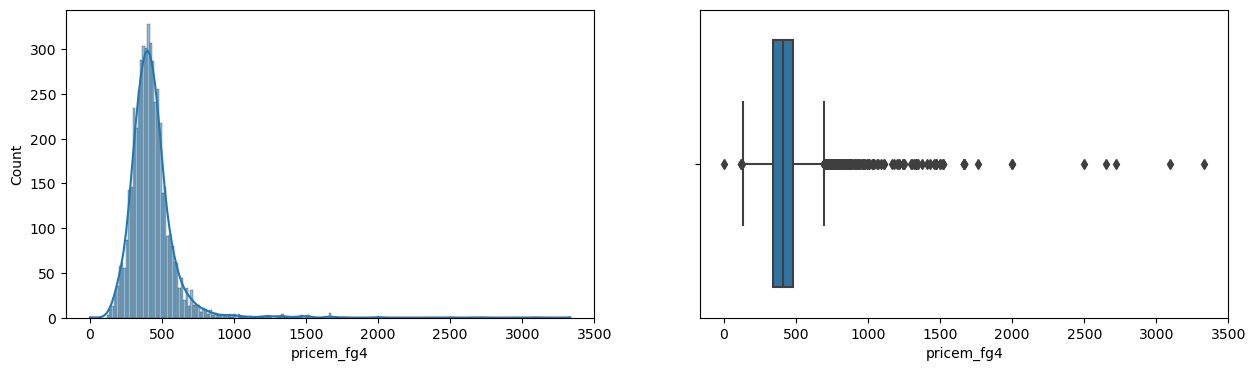

pricem_fg5
Skew : 10.02


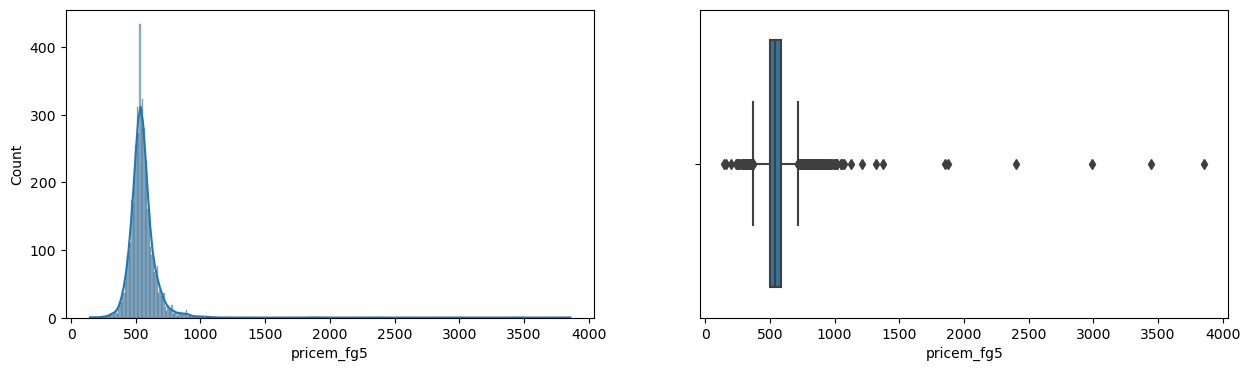

pricem_fg6
Skew : 9.96


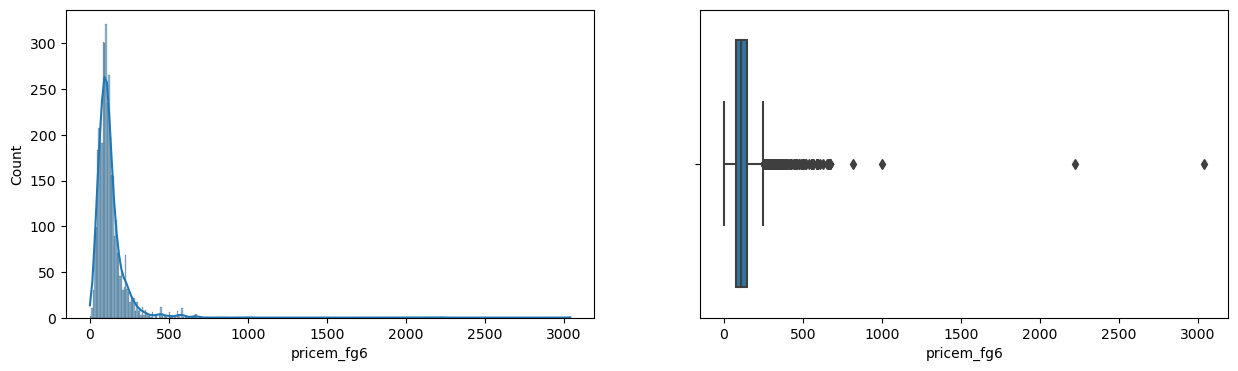

pricem_fg7
Skew : 4.96


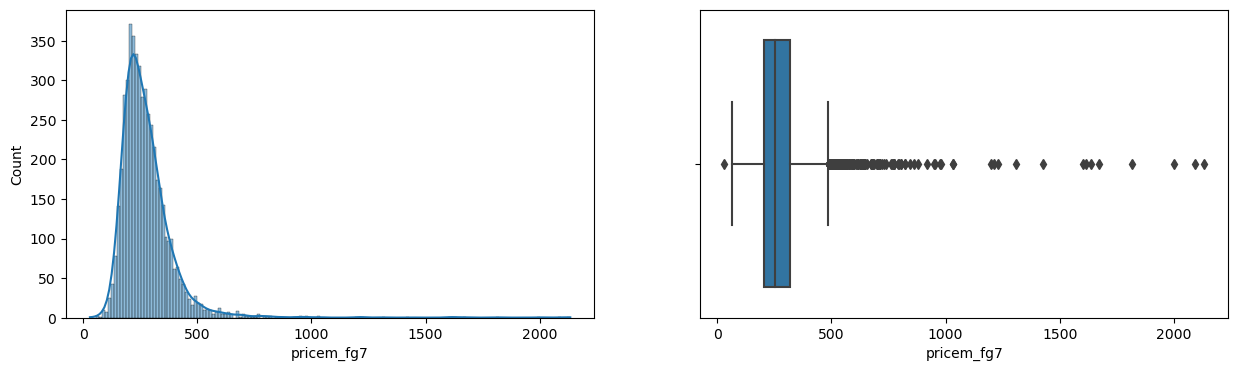

pricem_fg8
Skew : 2.04


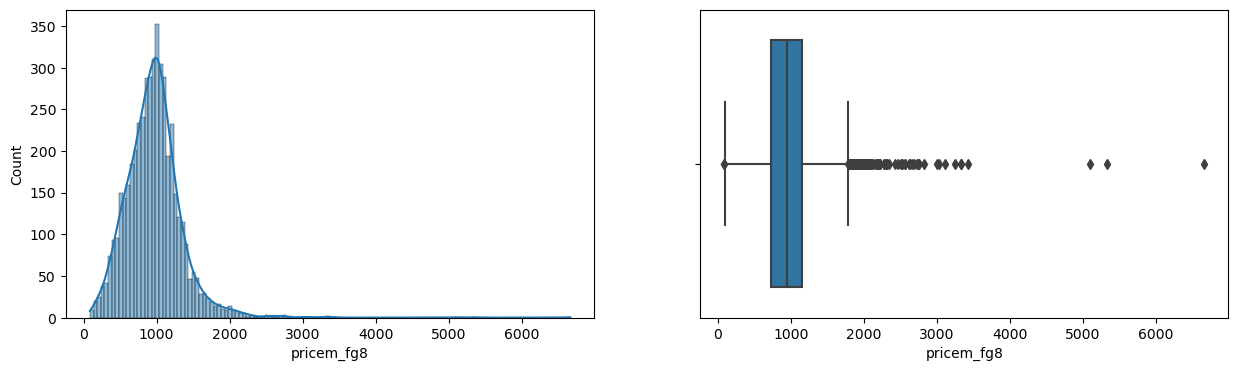

pricem_fg9
Skew : -0.06


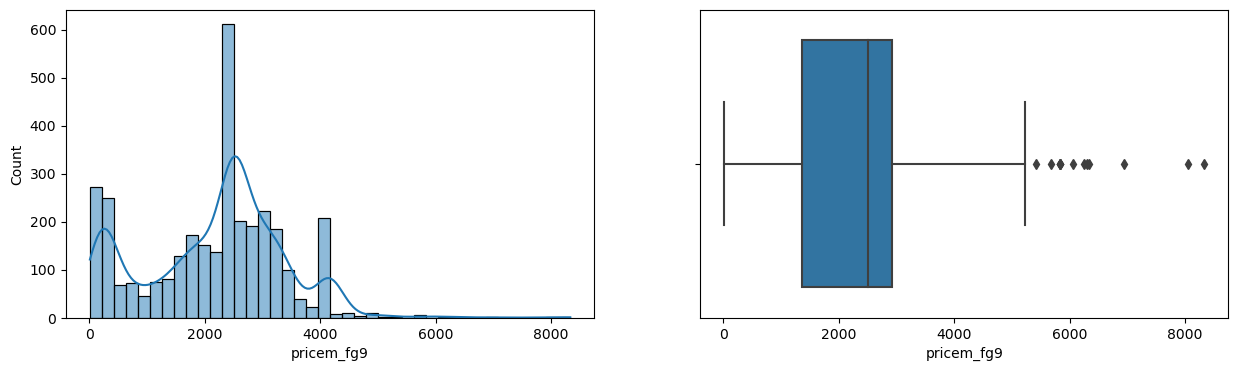

pricem_fg10
Skew : 1.35


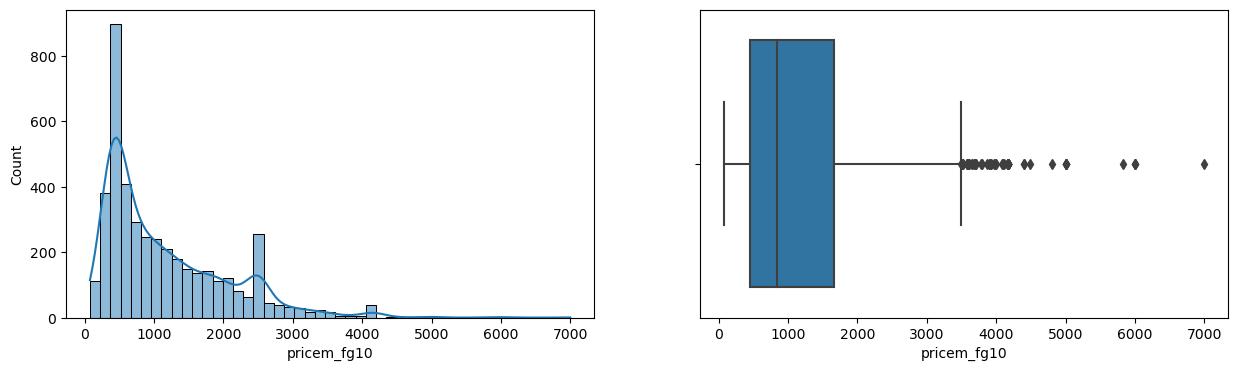

pricem_fg11
Skew : 0.91


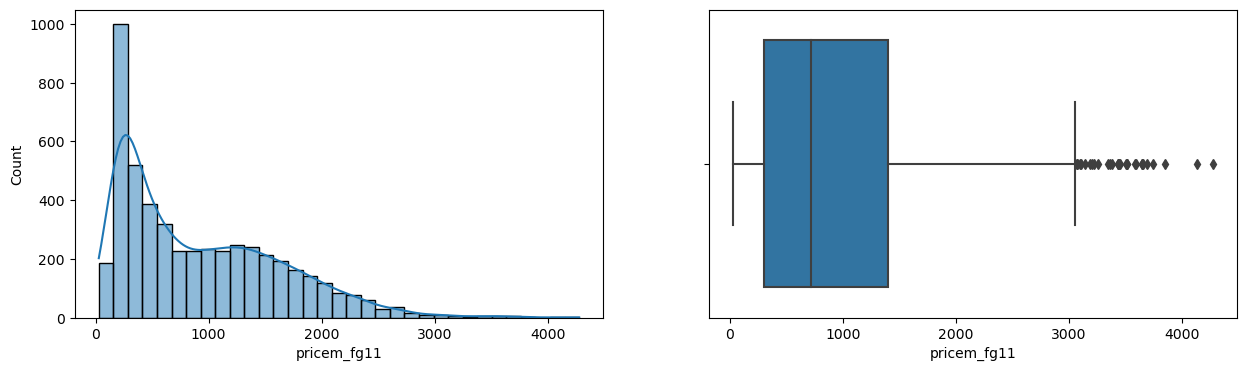

pricem_fg12
Skew : 2.11


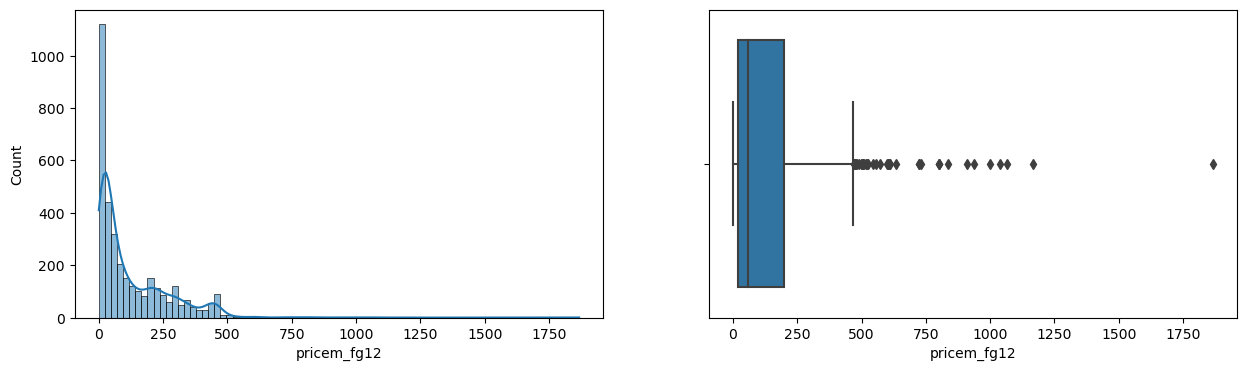

In [108]:
for col in food_price_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(data = data, x = data[col], kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

food_exp
Skew : 2.42


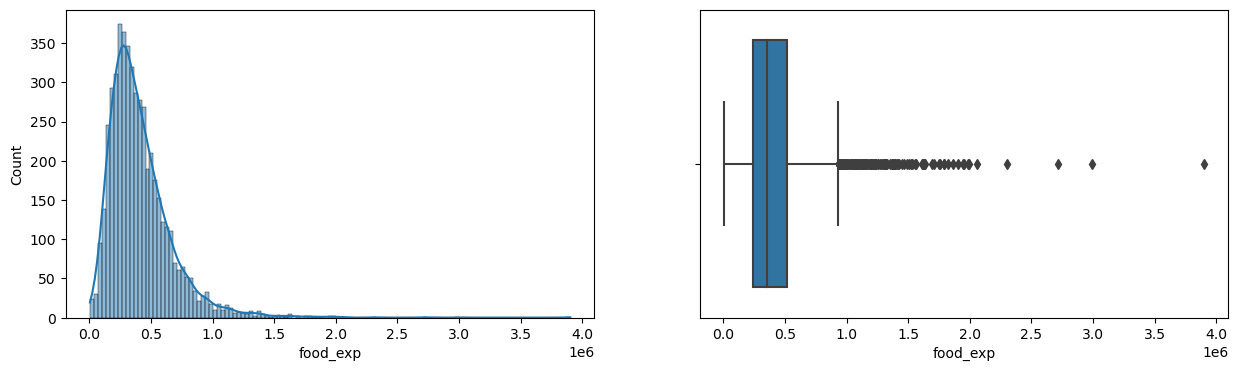

nonfood_exp
Skew : 4.31


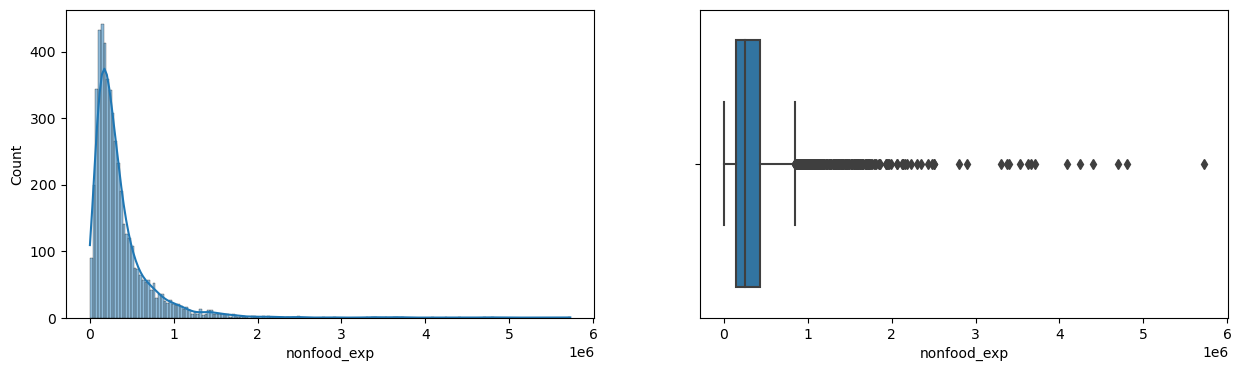

In [120]:
for col in expenditure_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(data = data, x = data[col], kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

wt_wave4
Skew : 2.9


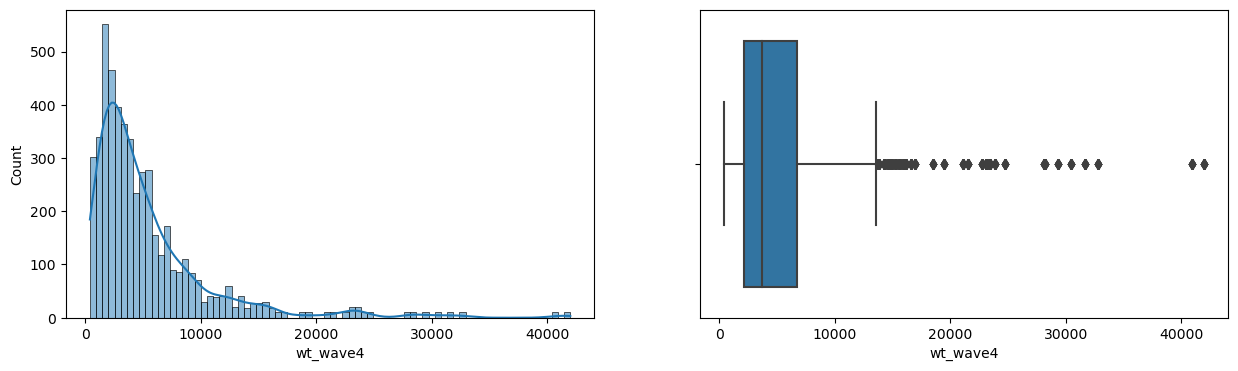

hhage
Skew : 0.43


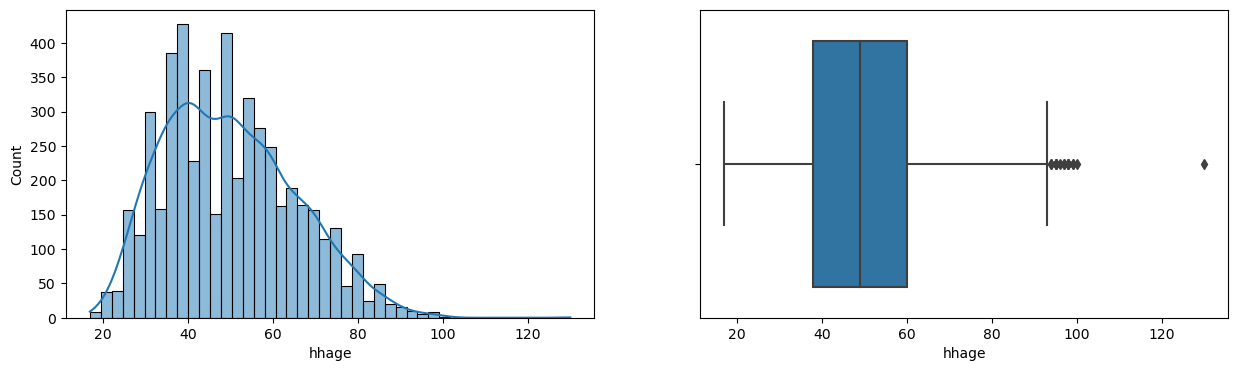

hhsize
Skew : 1.2


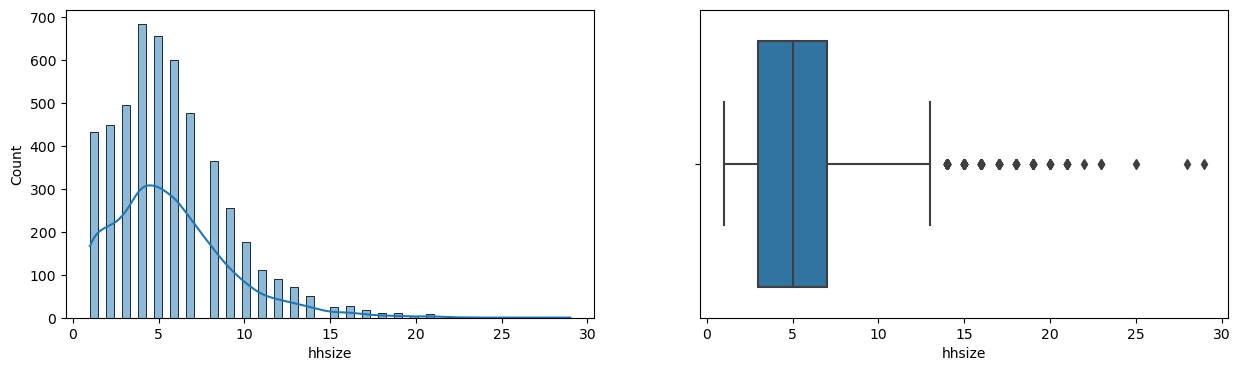

hhsize_eqdul
Skew : 1.22


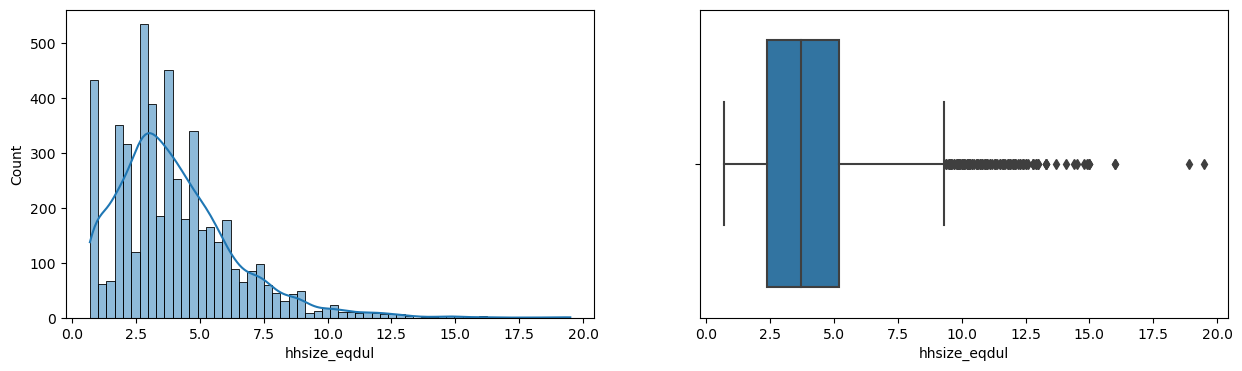

hhame
Skew : 1.23


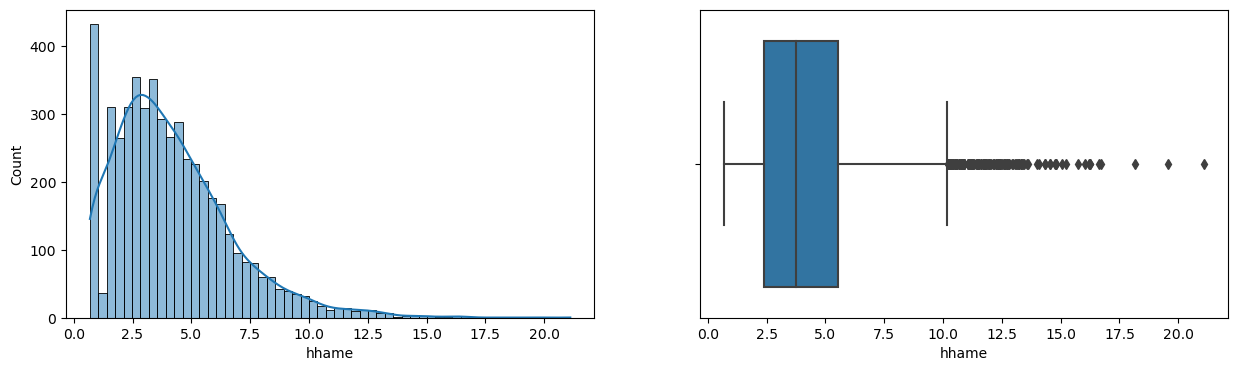

popw
Skew : 4.2


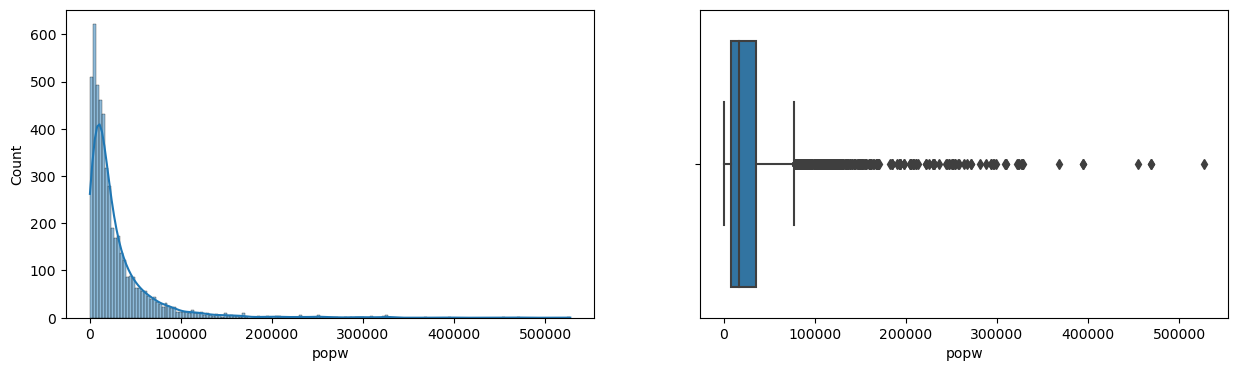

In [121]:
for col in other:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(data = data, x = data[col], kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

### Univariate analysis for categorical variables

In [16]:
# Printing the % sub categories of each category
for i in categorical_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Male      0.807524
Female    0.192476
Name: hhgender, dtype: float64
****************************************
Abia           0.052349
Adamawa        0.046775
Lagos          0.046576
Bauchi         0.045581
Akwa Ibom      0.043392
Kaduna         0.042994
Kwara          0.040804
Benue          0.034634
Imo            0.034037
Enugu          0.033838
Edo            0.033041
Delta          0.031449
Katsina        0.030454
Kano           0.029459
Oyo            0.029061
Ekiti          0.028463
Niger          0.028264
Ogun           0.028065
Gombe          0.026871
FCT            0.024881
Anambra        0.024084
Taraba         0.022293
Ebonyi         0.022094
Jigawa         0.021696
Cross River    0.020701
Rivers         0.020701
Kogi           0.019705
Ondo           0.018312
Kebbi          0.017516
Osun           0.016521
Plateau        0.016123
Bayelsa        0.015127
Yobe           0.013933
Sokoto         0.013933
Zamfara        0.011943
Borno          0.009554
Nasarawa       0.004777
Na

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

## Bivariate Analysis

Now, let's move ahead with bivariate analysis to understand how variables are related to each other and if there is a strong relationship between dependent and independent variables present in the nutrient dataset.

Now, let's check the correlation among different variables.
Next, we are trying to find out linear correlations between the variables. This will help us to know which numerical variables are correlated with the target variable. Also, we can find out multi-collinearity, i.e., which pair of independent variables are correlated with each other.

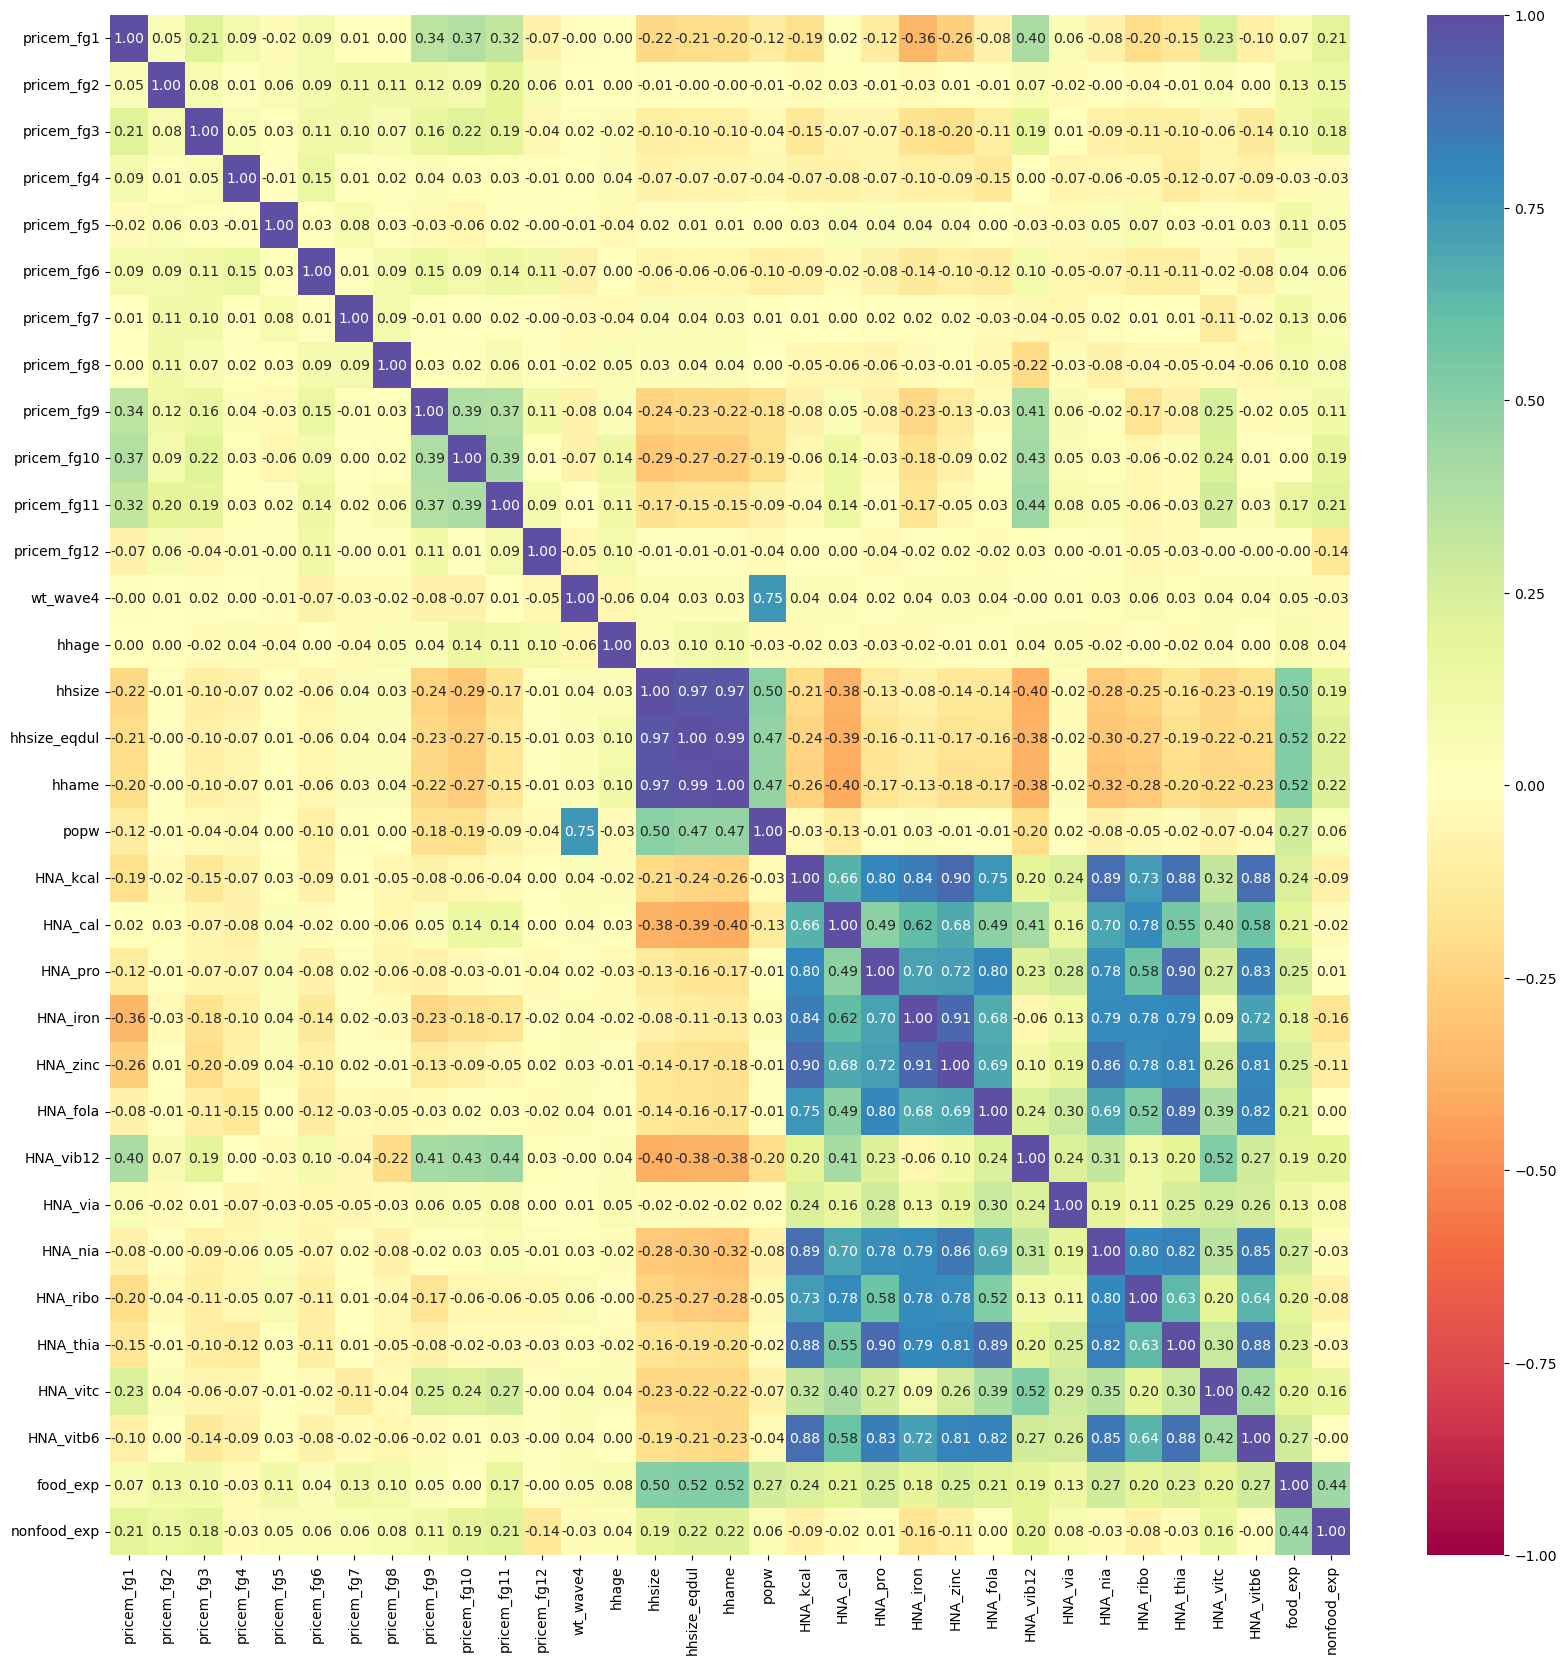

In [17]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 20))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

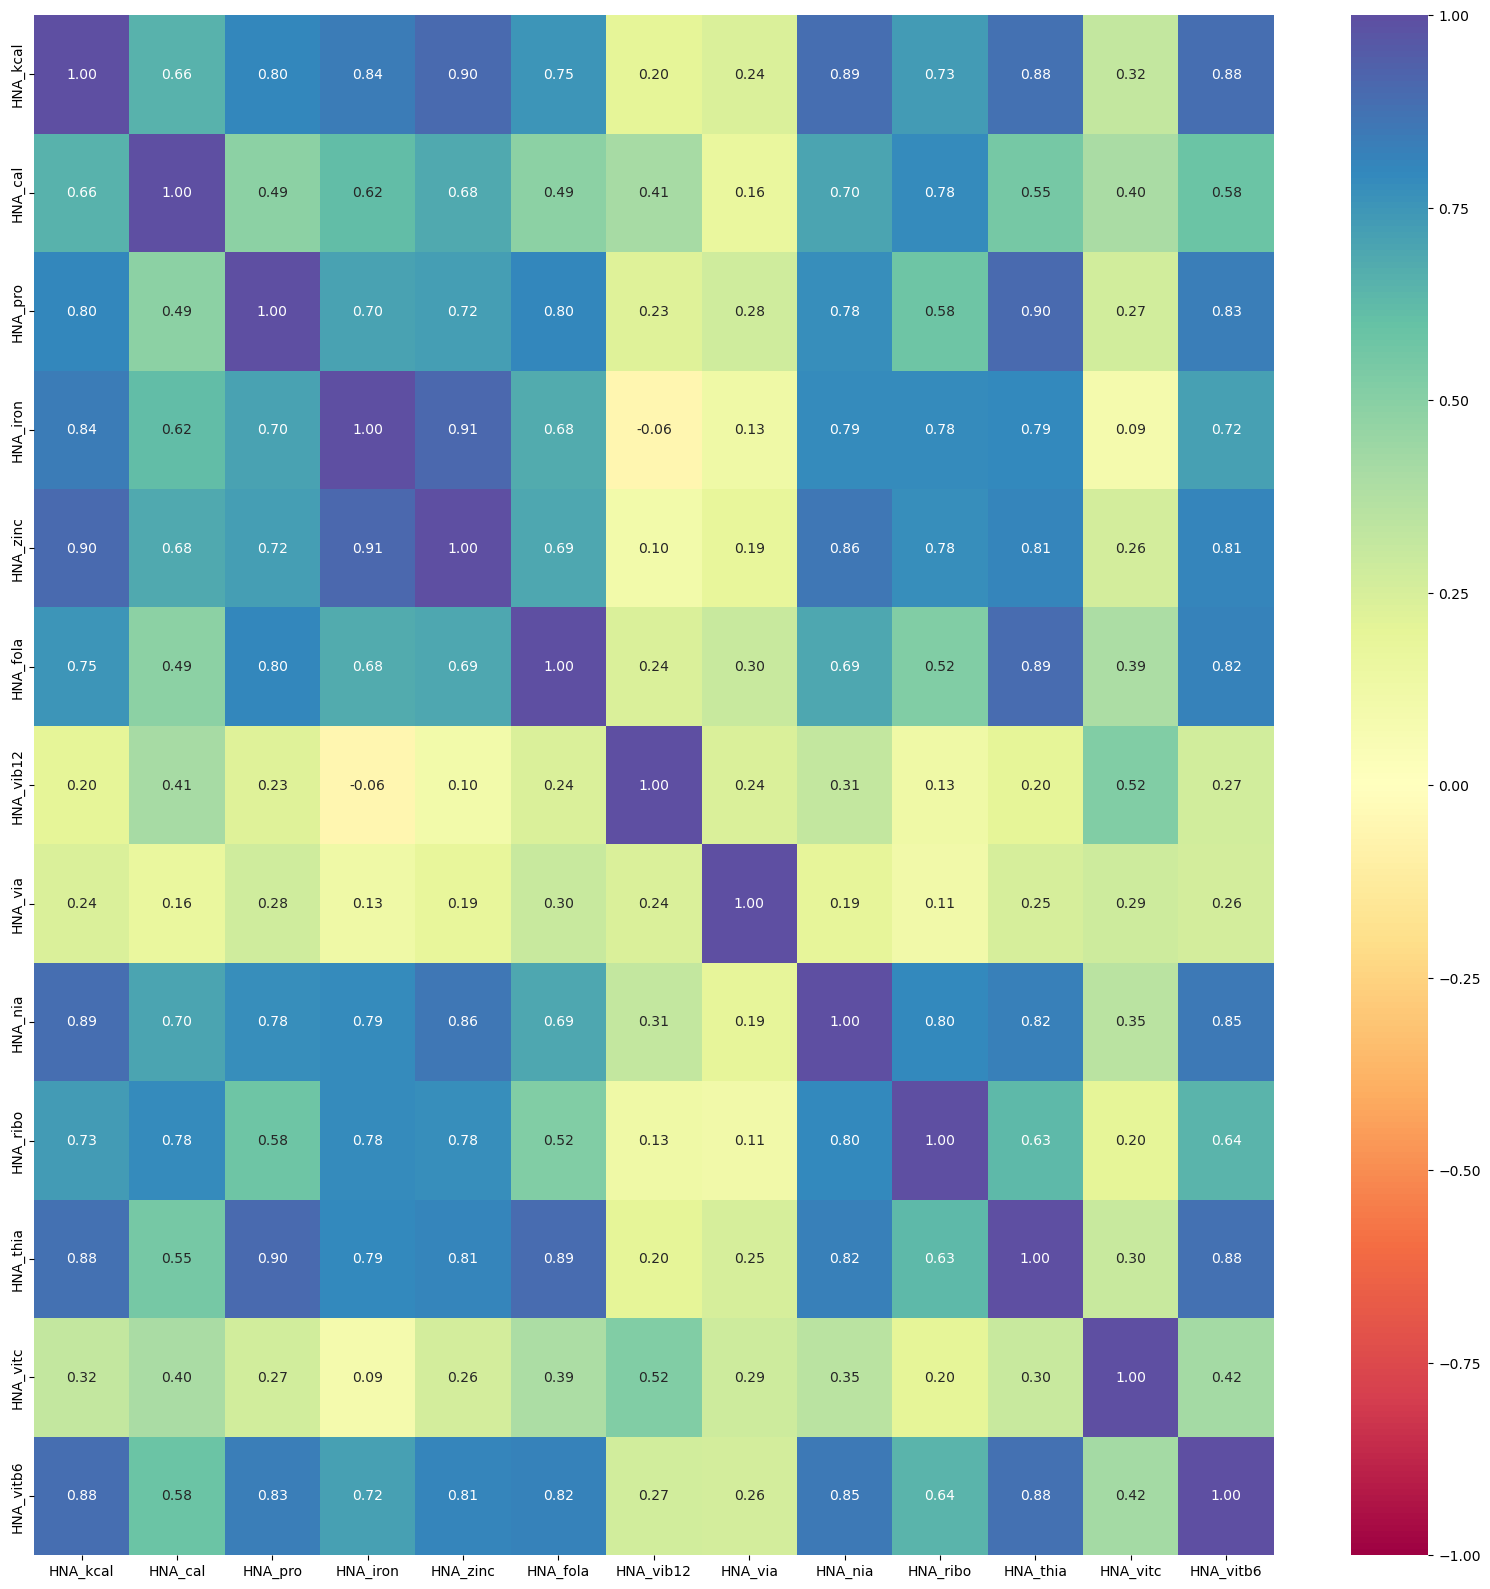

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[nutrient_adequacy_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Next, we are creating the bivariate scatter plots to check relationships between the pair of independent and dependent variables.

In [19]:
df = data[['HNA_cal','sector',
'hhgender',
'Matri_statu',
'hh_qual']]

In [20]:
# Creating dummy variables for the categorical columns, drop_first = True is used to avoid redundant variables
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

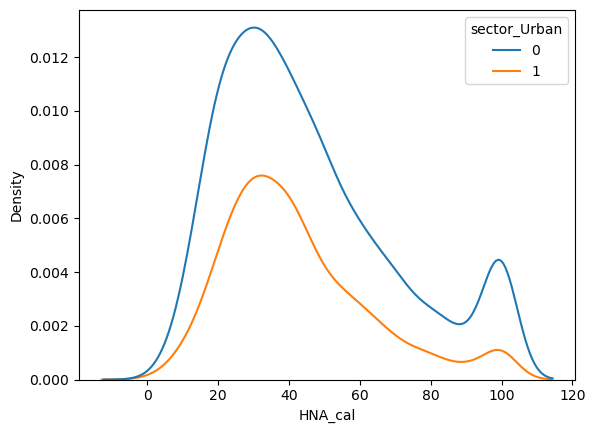

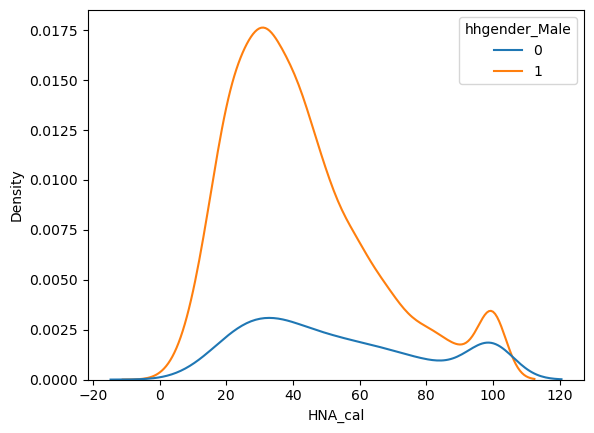

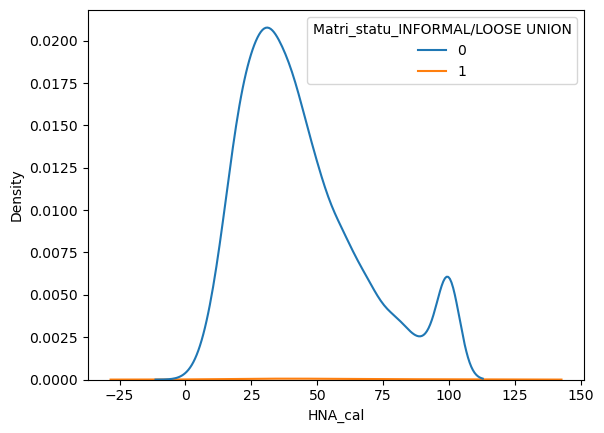

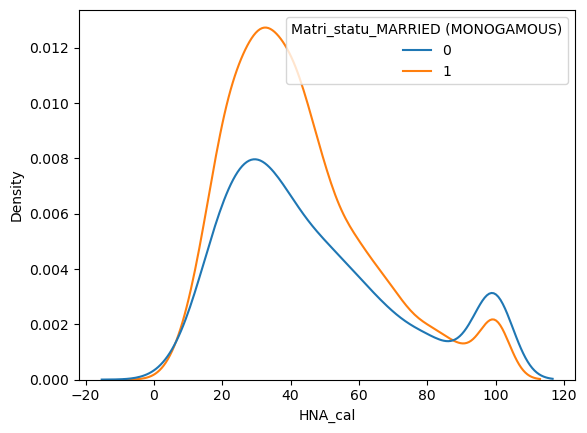

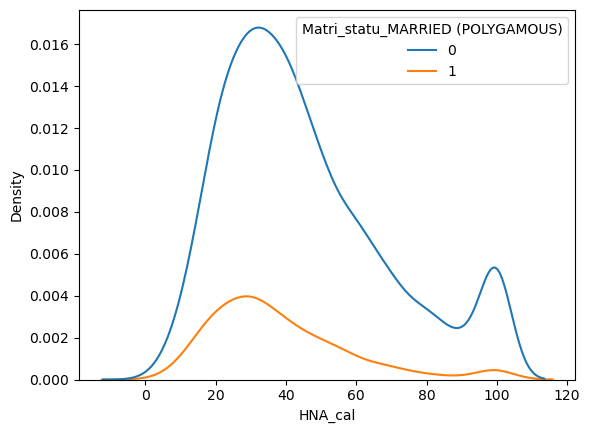

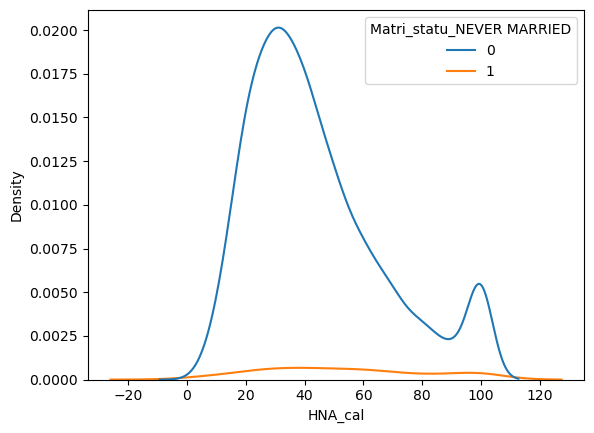

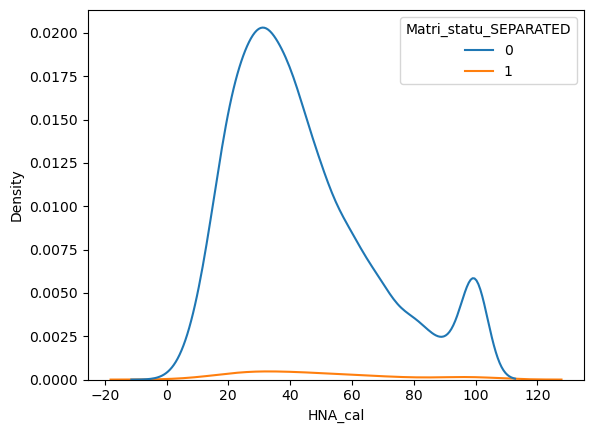

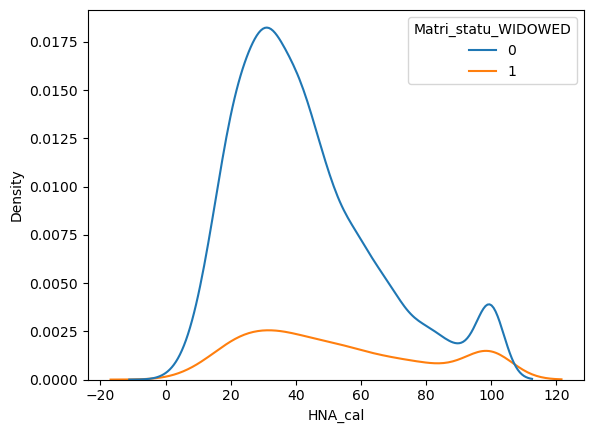

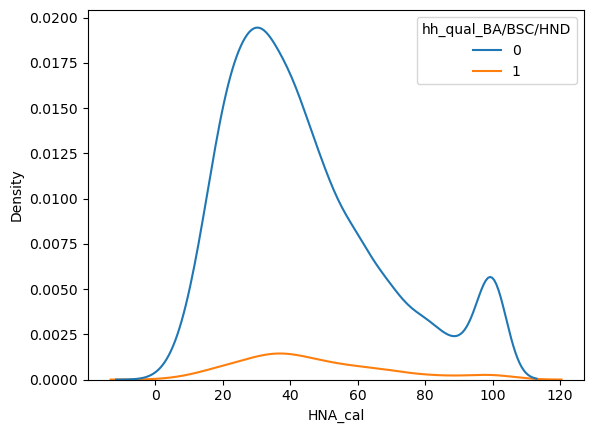

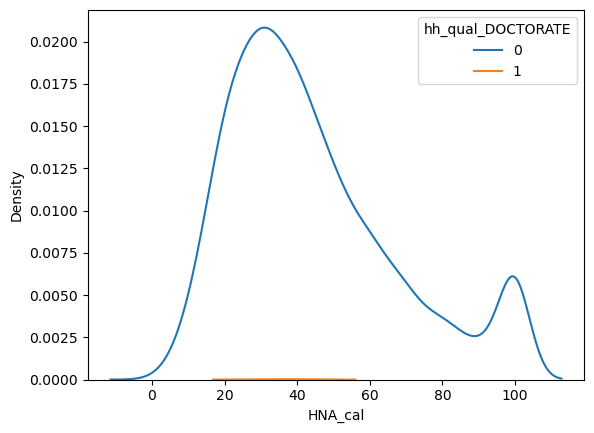

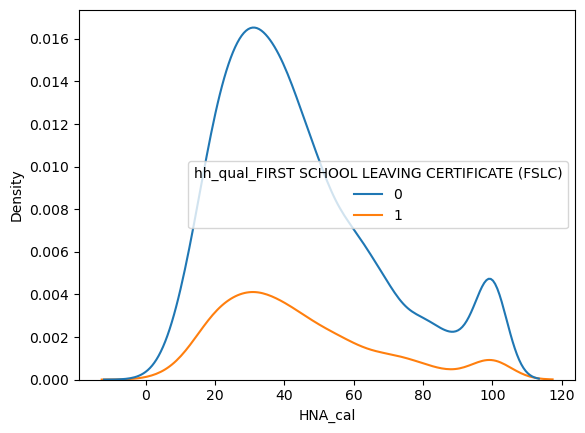

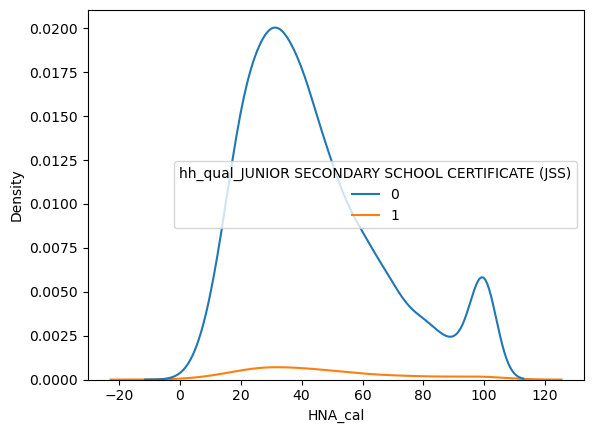

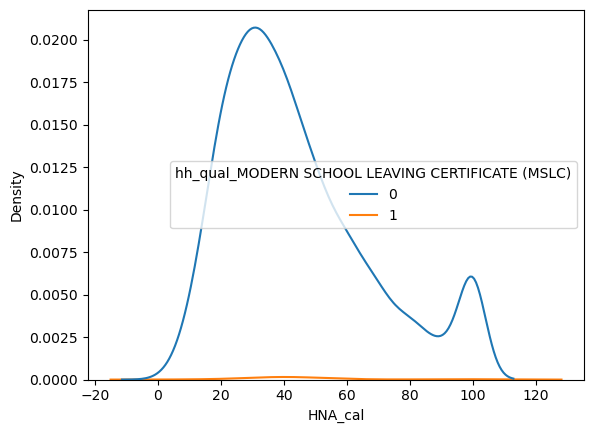

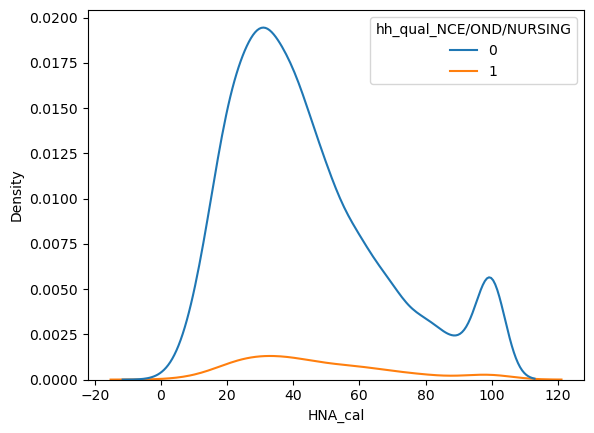

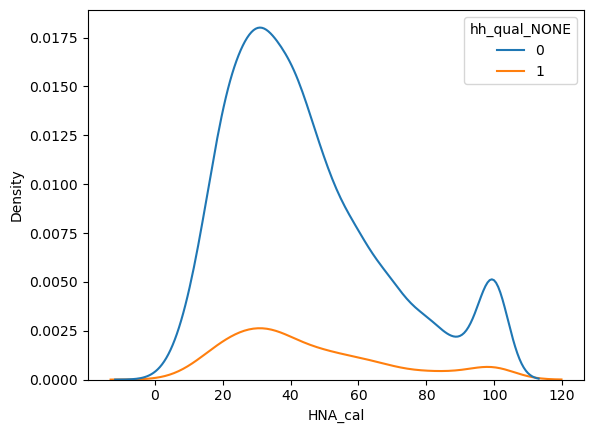

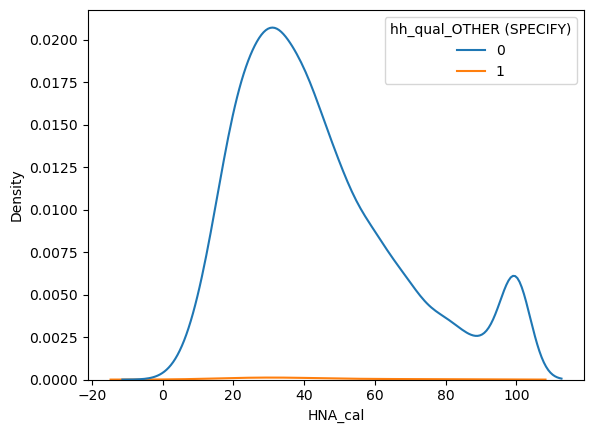

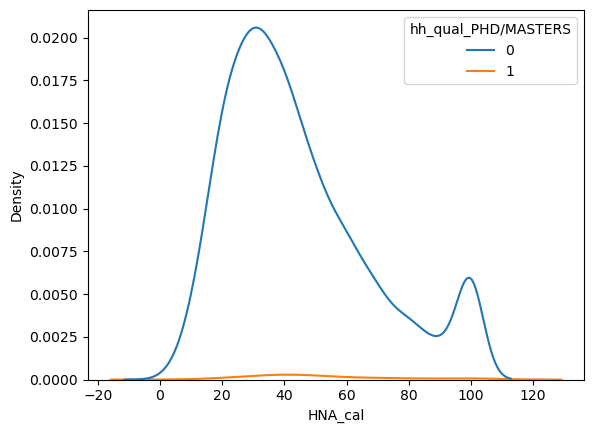

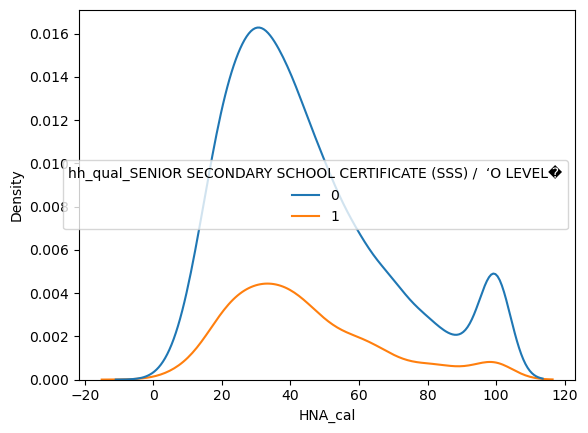

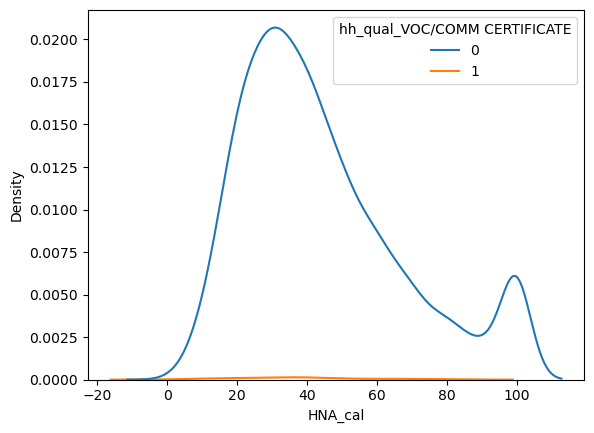

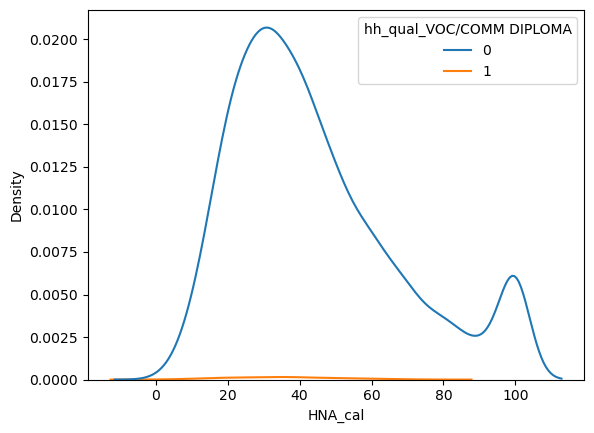

In [21]:
cols=df.drop('HNA_cal',axis = 1).columns.to_list()
for i in cols:
    sns.kdeplot(df.HNA_cal,hue=df[i])
    plt.show()

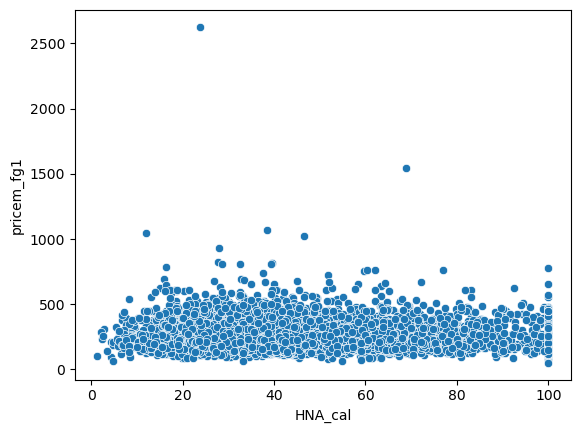

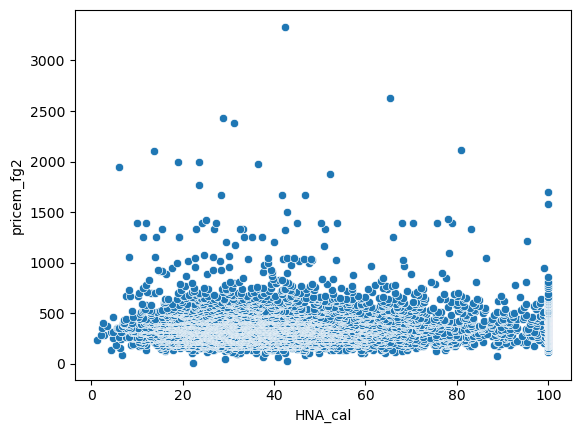

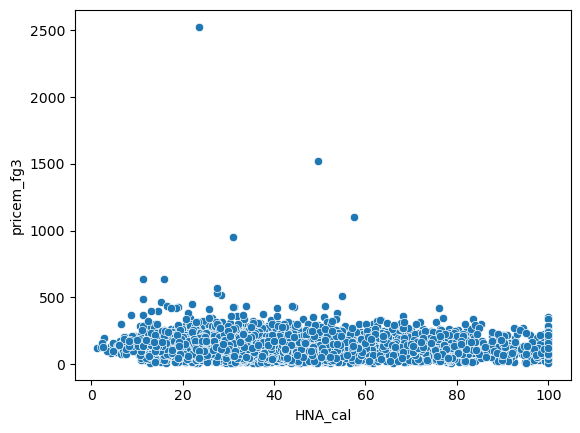

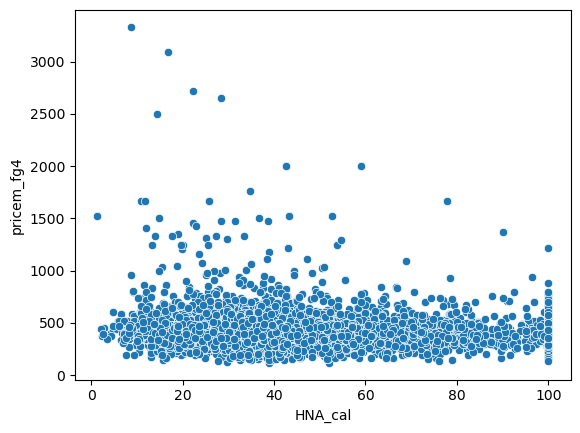

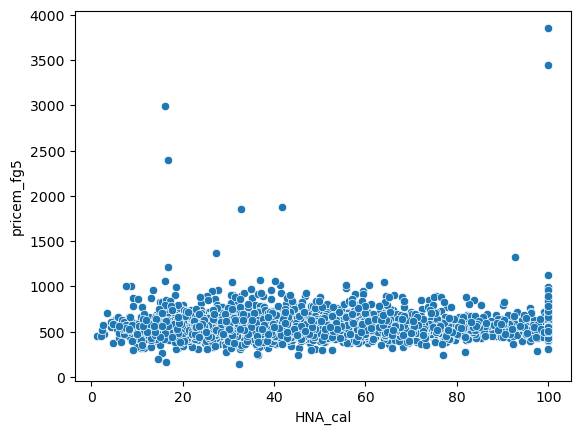

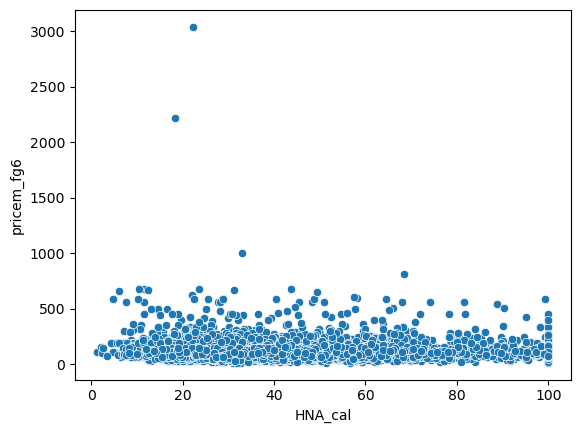

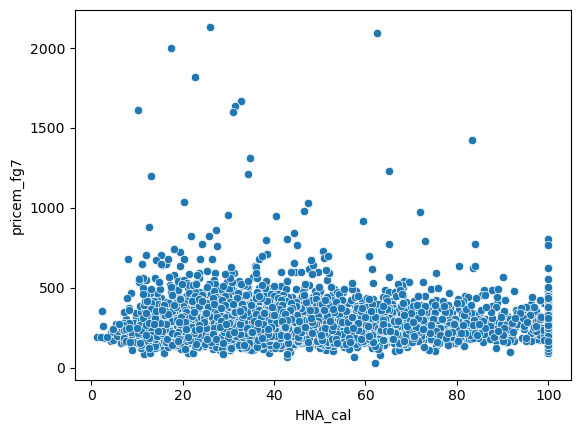

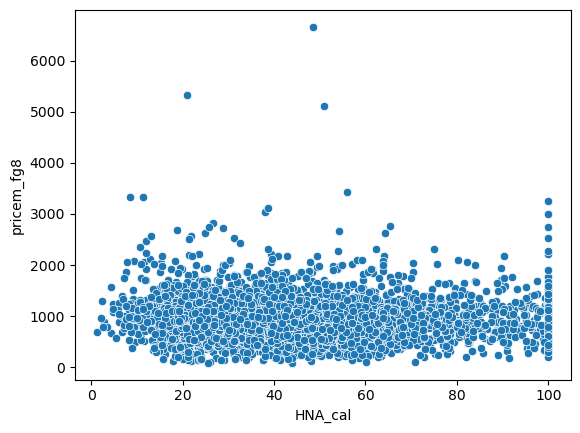

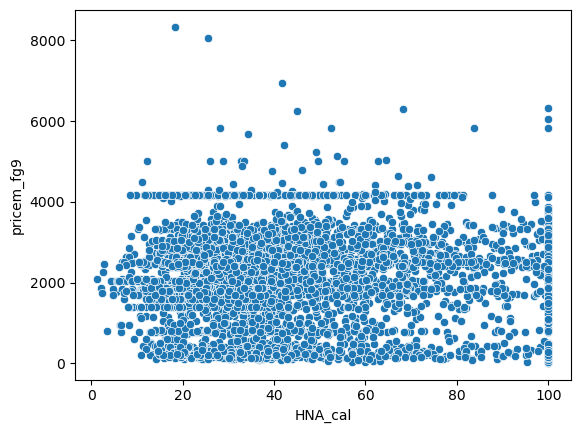

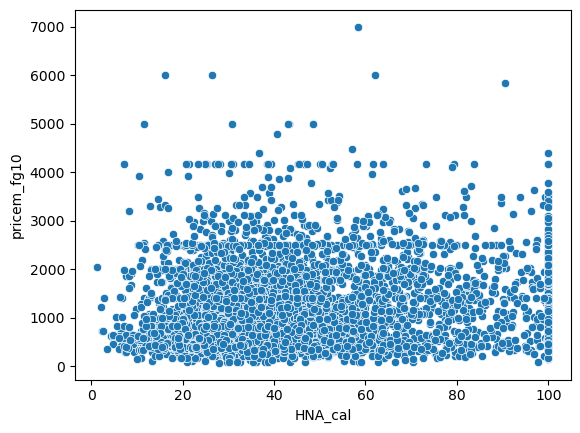

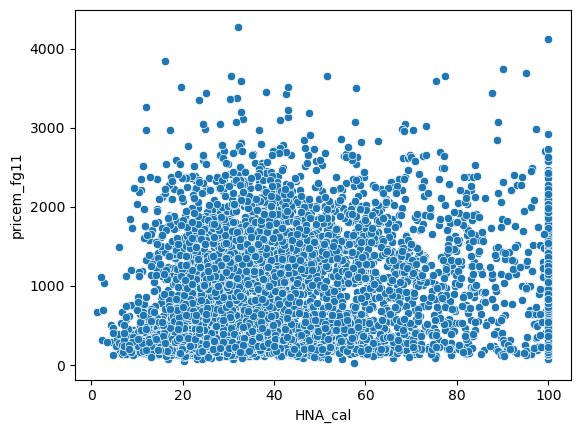

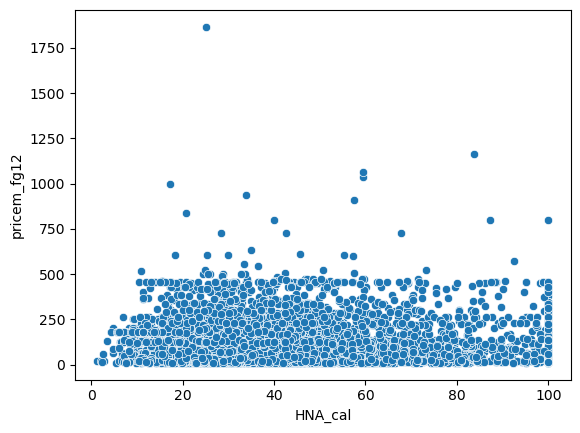

In [22]:
#Bi-variate scatterplot for all numerical variables with the dependent variable
#nutrient_adequacy_cols,food_price_cols,expenditure_cols,other
for i in food_price_cols:
    sns.scatterplot(y = data[i], x = 'HNA_cal', data = data);
    plt.show()


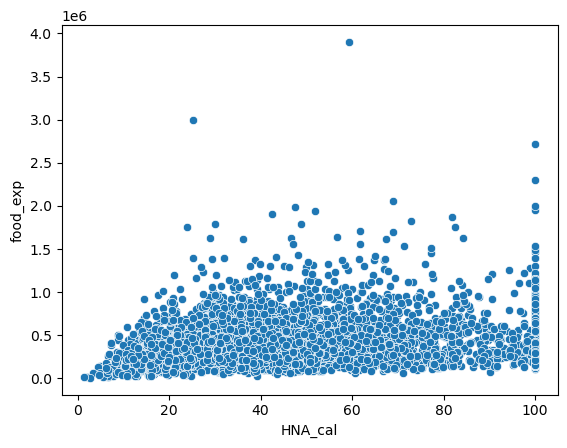

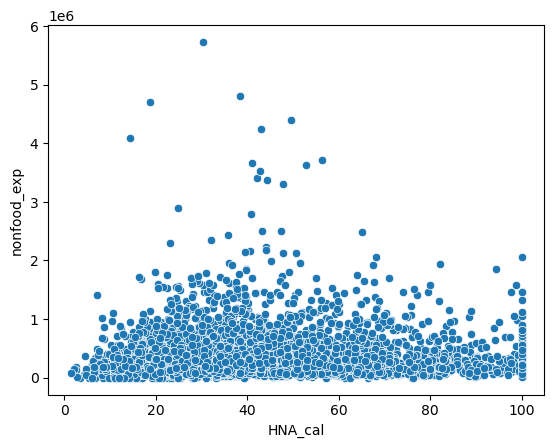

In [121]:
#nutrient_adequacy_cols,food_price_cols,expenditure_cols,other
for i in expenditure_cols:
    sns.scatterplot(y = data[i], x = 'HNA_cal', data = data)
    plt.show()

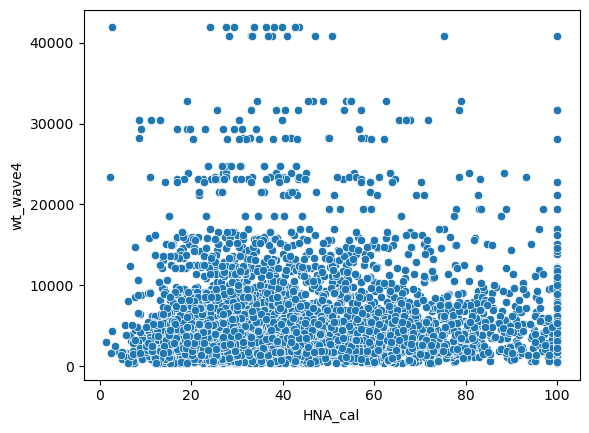

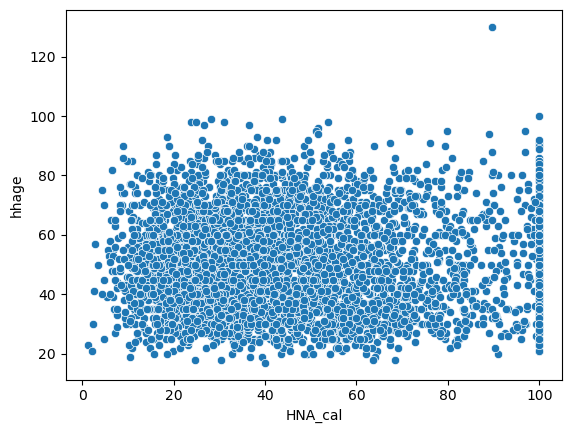

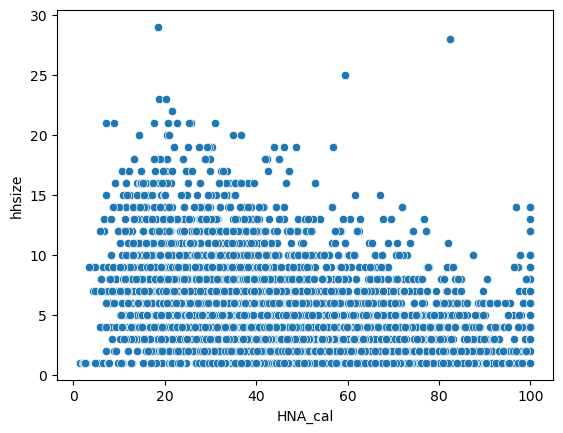

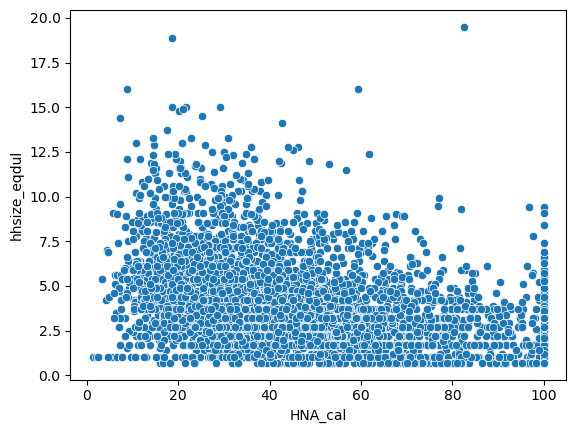

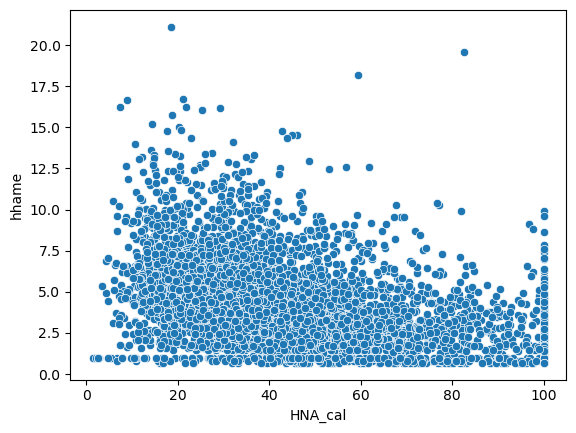

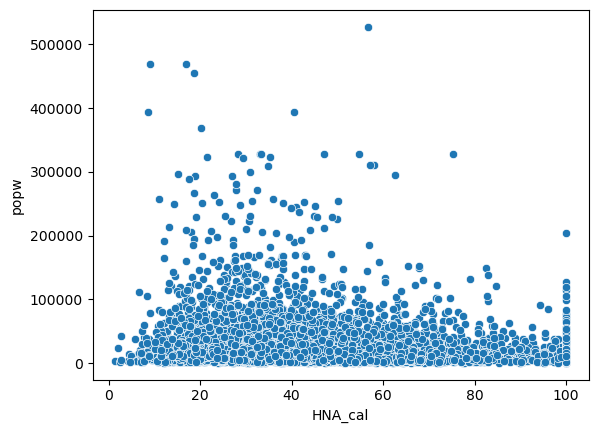

In [23]:
#nutrient_adequacy_cols,food_price_cols,expenditure_cols,other
for i in other:
    sns.scatterplot(y = data[i], x = 'HNA_cal', data = data)
    plt.show()

## Data Preprocessing and Feature engineering

Before we proceed to build a model, we'll have to encode categorical features.
Separate independent variables and the dependent variable.
We'll split the data into train and test to be able to evaluate the model that we train on the training data.

Check the distribution of the target variable

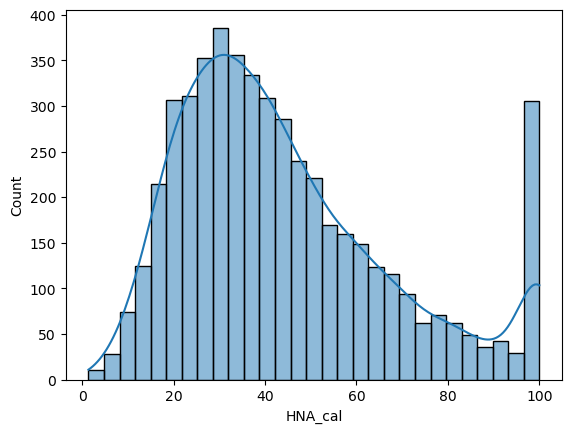

In [24]:
sns.histplot(data = data, x = data['HNA_cal'], kde = True)
plt.show()

In [25]:
print('Skew of HNA_cal:',round(data['HNA_cal'].skew(),2))

Skew of HNA_cal: 0.87


The dependent variable HNA_cal seems to be slightly right-skewed.
As the dependent variable is sightly skewed, we will apply a log transformation on the 'HNA_cal' column and check the distribution of the transformed column.

In [26]:
data['HNA_cal_log'] = np.log(data['HNA_cal'])
sns.histplot(data = data, x = 'HNA_cal_log', kde = True)

<AxesSubplot:xlabel='HNA_cal_log', ylabel='Count'>

In [137]:
print('Skew of HNA_cal_log:',round(data['HNA_cal_log'].skew(),2))

Skew of HNA_cal_log: -0.44


In [ ]:
data['Age'] = pd.cut(x=data['hhage'], bins=[17, 63, 130],
                     labels=['Adult',
                             'Elderly'])

In [27]:
data = data[['HNA_cal','pricem_fg1',
'pricem_fg2',
'pricem_fg3',
'pricem_fg4',
'pricem_fg5',
'pricem_fg6',
'pricem_fg7',
'pricem_fg8',
'pricem_fg9',
'pricem_fg10',
'pricem_fg11',
'pricem_fg12',
'food_exp',
'nonfood_exp',
'hhsize',
'hhage','sector',
'hhgender',
'Matri_statu',
'hh_qual']]

In [28]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2),'# of Missing Values':data.isna().sum()}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values  # of Missing Values
hh_qual                    24.88                 1250
pricem_fg11                 0.00                    0
Matri_statu                 0.00                    0
hhgender                    0.00                    0
sector                      0.00                    0
hhage                       0.00                    0
hhsize                      0.00                    0
nonfood_exp                 0.00                    0
food_exp                    0.00                    0
pricem_fg12                 0.00                    0
HNA_cal                     0.00                    0
pricem_fg1                  0.00                    0
pricem_fg9                  0.00                    0
pricem_fg8                  0.00                    0
pricem_fg7                  0.00                    0
pricem_fg6                  0.00                    0
pricem_fg5                  0.00                    0
pricem_fg4                  0.00                    0
pricem_fg3                  0.00                    0
pricem_fg2                  0.00                    0
pricem_fg10                 0.00                    0

### Missing Value Treatment

Let's look at the percentage of dataset without missing values.

In [30]:
print(round(data.dropna().shape[0]/data.shape[0]*100,2))

75.12


If we drop all missing values from the dataset, we'll work only on 35.91%. We need to deal with missing values like imputation methods.

In [125]:
#data[food_price_cols] = data[food_price_cols].fillna(0, inplace=False)

In [31]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2),'# of Missing Values':data.isna().sum()}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values  # of Missing Values
hh_qual                    24.88                 1250
pricem_fg11                 0.00                    0
Matri_statu                 0.00                    0
hhgender                    0.00                    0
sector                      0.00                    0
hhage                       0.00                    0
hhsize                      0.00                    0
nonfood_exp                 0.00                    0
food_exp                    0.00                    0
pricem_fg12                 0.00                    0
HNA_cal                     0.00                    0
pricem_fg1                  0.00                    0
pricem_fg9                  0.00                    0
pricem_fg8                  0.00                    0
pricem_fg7                  0.00                    0
pricem_fg6                  0.00                    0
pricem_fg5                  0.00                    0
pricem_fg4                  0.00                    0
pricem_fg3                  0.00                    0
pricem_fg2                  0.00                    0
pricem_fg10                 0.00                    0

Look at a few rows where hh_qual is missing

In [32]:
data[data["hh_qual"].isnull()]

HNA_cal  pricem_fg1   pricem_fg2  pricem_fg3  pricem_fg4  pricem_fg5  \
8     31.896700  478.535332    99.244877  234.322703  514.676509  748.148149   
9     36.085077  193.637369   104.347828   85.961873  399.161495  707.729469   
10    59.785626  316.228791   105.263159  134.147609  393.700775  513.361160   
13    42.467957  201.782034   105.263159   95.642899  442.817883  533.333337   
19    31.409470  169.677710   109.649124  130.039009  539.255201  491.743119   
...         ...         ...          ...         ...         ...         ...   
5015  36.412408  354.223443  1980.198060  145.682246  602.957896  384.409872   
5017  18.959940  188.702366  1999.999970   44.206787  471.040731  666.666667   
5018  13.793213  191.839966  2105.263226  167.464122  485.221037  559.440571   
5020  31.219254  139.109804  2380.952413   63.610363  344.776529  377.777778   
5023  42.345132  209.968752  3333.333408  113.913751  448.008345  721.153852   

      pricem_fg6  pricem_fg7   pricem_fg8   pricem_fg9  pricem_fg10  \
8     175.869678  320.380038   973.623682  3416.557759  1424.622839   
9      80.857388  127.605732   422.656254  1613.706911   658.380894   
10    199.999997  205.062077  1052.631592  2043.269177  1680.260979   
13    113.721567  226.866140  1086.920815  2667.842688  2849.270916   
19     80.857388  383.197062  1050.420170  1391.340675   361.111097   
...          ...         ...          ...          ...          ...   
5015  102.042439  280.333662   979.579589  1874.999955  2500.000056   
5017  142.771357  166.627147  1606.481457  2465.413131   595.222057   
5018  119.047623  269.607840   377.906984  2046.935867   686.302508   
5020  106.038779  221.860543  1778.848403  2399.555457  1403.459410   
5023  156.058071  253.058179  1000.000000  1795.114539   505.617969   

      pricem_fg11  pricem_fg12       food_exp    nonfood_exp  hhsize  hhage  \
8     3381.558539   133.395551  460102.446306  247732.228271       7     52   
9     1277.396647   128.176413  385418.098249  472035.073914       6     70   
10     661.801774   475.314258   91885.298433   95591.807556       1     77   
13    1367.721129    84.872130  150784.301504   91840.188477       2     92   
19    1026.525829   128.176413  255658.230607   94444.643433       5     40   
...           ...          ...            ...            ...     ...    ...   
5015  1533.149212   181.706421  218015.135711  168444.321899       2     90   
5017   460.122703   262.192153  369078.488682   14718.962764       8     55   
5018   675.437334   182.281193  194555.571660  174624.824480       8     48   
5020  2035.437226   229.585275  262559.674565  168850.290820       7     55   
5023   450.884743   285.714291  291069.209521  185774.207581       5     30   

     sector hhgender           Matri_statu hh_qual  
8     Rural   Female               WIDOWED     NaN  
9     Rural     Male               WIDOWED     NaN  
10    Rural   Female               WIDOWED     NaN  
13    Rural     Male  MARRIED (MONOGAMOUS)     NaN  
19    Rural     Male  MARRIED (MONOGAMOUS)     NaN  
...     ...      ...                   ...     ...  
5015  Rural   Female               WIDOWED     NaN  
5017  Rural   Female               WIDOWED     NaN  
5018  Rural     Male  MARRIED (MONOGAMOUS)     NaN  
5020  Rural     Male  MARRIED (POLYGAMOUS)     NaN  
5023  Rural     Male  MARRIED (POLYGAMOUS)     NaN  

[1250 rows x 21 columns]

In [33]:
# Creating dummy variables for the categorical columns, drop_first = True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [34]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2),'# of Missing Values':data.isna().sum()}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values  \
HNA_cal                                                             0.0   
Matri_statu_INFORMAL/LOOSE UNION                                    0.0   
Matri_statu_MARRIED (POLYGAMOUS)                                    0.0   
Matri_statu_NEVER MARRIED                                           0.0   
Matri_statu_SEPARATED                                               0.0   
Matri_statu_WIDOWED                                                 0.0   
hh_qual_BA/BSC/HND                                                  0.0   
hh_qual_DOCTORATE                                                   0.0   
hh_qual_FIRST SCHOOL LEAVING CERTIFICATE (FSLC)                     0.0   
hh_qual_JUNIOR SECONDARY SCHOOL CERTIFICATE (JSS)                   0.0   
hh_qual_MODERN SCHOOL LEAVING CERTIFICATE (MSLC)                    0.0   
hh_qual_NCE/OND/NURSING                                             0.0   
hh_qual_NONE                                                        0.0   
hh_qual_OTHER (SPECIFY)                                             0.0   
hh_qual_PHD/MASTERS                                                 0.0   
hh_qual_SENIOR SECONDARY SCHOOL CERTIFICATE (SS...                  0.0   
hh_qual_VOC/COMM CERTIFICATE                                        0.0   
Matri_statu_MARRIED (MONOGAMOUS)                                    0.0   
hhgender_Male                                                       0.0   
pricem_fg1                                                          0.0   
sector_Urban                                                        0.0   
pricem_fg2                                                          0.0   
pricem_fg3                                                          0.0   
pricem_fg4                                                          0.0   
pricem_fg5                                                          0.0   
pricem_fg6                                                          0.0   
pricem_fg7                                                          0.0   
pricem_fg8                                                          0.0   
pricem_fg9                                                          0.0   
pricem_fg10                                                         0.0   
pricem_fg11                                                         0.0   
pricem_fg12                                                         0.0   
food_exp                                                            0.0   
nonfood_exp                                                         0.0   
hhsize                                                              0.0   
hhage                                                               0.0   
hh_qual_VOC/COMM DIPLOMA                                            0.0   

                                                    # of Missing Values  
HNA_cal                                                               0  
Matri_statu_INFORMAL/LOOSE UNION                                      0  
Matri_statu_MARRIED (POLYGAMOUS)                                      0  
Matri_statu_NEVER MARRIED                                             0  
Matri_statu_SEPARATED                                                 0  
Matri_statu_WIDOWED                                                   0  
hh_qual_BA/BSC/HND                                                    0  
hh_qual_DOCTORATE                                                     0  
hh_qual_FIRST SCHOOL LEAVING CERTIFICATE (FSLC)                       0  
hh_qual_JUNIOR SECONDARY SCHOOL CERTIFICATE (JSS)                     0  
hh_qual_MODERN SCHOOL LEAVING CERTIFICATE (MSLC)                      0  
hh_qual_NCE/OND/NURSING                                               0  
hh_qual_NONE                                                          0  
hh_qual_OTHER (SPECIFY)                                               0  
hh_qual_PHD/MASTERS                                                   0  
hh_qual_SENIOR SE

In [35]:
# Checking the data after handling categorical data
data.describe().T

count           mean  \
HNA_cal                                             5024.0      44.283747   
pricem_fg1                                          5024.0     269.466011   
pricem_fg2                                          5024.0     387.658822   
pricem_fg3                                          5024.0     135.140684   
pricem_fg4                                          5024.0     429.550904   
pricem_fg5                                          5024.0     552.439919   
pricem_fg6                                          5024.0     125.113460   
pricem_fg7                                          5024.0     276.335843   
pricem_fg8                                          5024.0     961.194186   
pricem_fg9                                          5024.0    2094.213178   
pricem_fg10                                         5024.0    1159.195654   
pricem_fg11                                         5024.0     916.251864   
pricem_fg12                                         5024.0     125.198510   
food_exp                                            5024.0  411802.875317   
nonfood_exp                                         5024.0  354541.165495   
hhsize                                              5024.0       5.694068   
hhage                                               5024.0      49.929936   
sector_Urban                                        5024.0       0.322651   
hhgender_Male                                       5024.0       0.807524   
Matri_statu_INFORMAL/LOOSE UNION                    5024.0       0.003782   
Matri_statu_MARRIED (MONOGAMOUS)                    5024.0       0.581608   
Matri_statu_MARRIED (POLYGAMOUS)                    5024.0       0.161425   
Matri_statu_NEVER MARRIED                           5024.0       0.051553   
Matri_statu_SEPARATED                               5024.0       0.027667   
Matri_statu_WIDOWED                                 5024.0       0.164013   
hh_qual_BA/BSC/HND                                  5024.0       0.069268   
hh_qual_DOCTORATE                                   5024.0       0.000398   
hh_qual_FIRST SCHOOL LEAVING CERTIFICATE (FSLC)     5024.0       0.199642   
hh_qual_JUNIOR SECONDARY SCHOOL CERTIFICATE (JSS)   5024.0       0.038615   
hh_qual_MODERN SCHOOL LEAVING CERTIFICATE (MSLC)    5024.0       0.005573   
hh_qual_NCE/OND/NURSING                             5024.0       0.066680   
hh_qual_NONE                                        5024.0       0.126990   
hh_qual_OTHER (SPECIFY)                             5024.0       0.005175   
hh_qual_PHD/MASTERS                                 5024.0       0.013933   
hh_qual_SENIOR SECONDARY SCHOOL CERTIFICATE (SS...  5024.0       0.209395   
hh_qual_VOC/COMM CERTIFICATE                        5024.0       0.005971   
hh_qual_VOC/COMM DIPLOMA                            5024.0       0.006170   

                                                              std  \
HNA_cal                                                 23.361680   
pricem_fg1                                             116.023149   
pricem_fg2                                             193.063548   
pricem_fg3                                              78.640436   
pricem_fg4                                             170.043231   
pricem_fg5                                             121.667033   
pricem_fg6                                              91.685069   
pricem_fg7                                             121.768930   
pricem_fg8                                             378.990494   
pricem_fg9                                            1044.783656   
pricem_fg10                                            843.199758   
pricem_fg11                                            698.185338   
pricem_fg12                                            122.340079   
food_exp                                            259139.150154   
nonfood_exp                                         371510.647307   
hhsize                

In [79]:
#hh_educ hh_qual hhage Matri_statu hhsize food_exp nonfood_exp hhgender
# Separating independent variables and the target variable

x = data.drop('HNA_cal',axis = 1) #regressors

y = data['HNA_cal'] # target variable

In [80]:
# Splitting the dataset into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [81]:
# Checking the shape of the train and the test data

print("Shape of Training set : ", x_train.shape)

print("Shape of test set : ", x_test.shape)

Shape of Training set :  (4019, 36)
Shape of test set :  (1005, 36)


Next, we will check the multicollinearity in the train dataset.

Check for Multicollinearity
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

Variance Inflation factor: Variance inflation factors measures the inflation in the variances of the regression parameter estimates due to collinearity that exists among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

                                              feature        VIF
0                                          pricem_fg1   9.036789
1                                          pricem_fg2   5.361013
2                                          pricem_fg3   4.315712
3                                          pricem_fg4   7.379590
4                                          pricem_fg5  27.248211
5                                          pricem_fg6   2.999236
6                                          pricem_fg7   7.060650
7                                          pricem_fg8   7.788128
8                                          pricem_fg9   7.075870
9                                         pricem_fg10   4.305315
10                                        pricem_fg11   3.947191
11                                        pricem_fg12   2.366282
12                                           food_exp   6.521564
13                                        nonfood_exp   3.377056
14                       

In [75]:
VIF_df = pd.DataFrame(checking_vif(x_train))
cols = VIF_df[VIF_df['VIF']>5]
cols.feature.tolist()

['pricem_fg1',
 'pricem_fg2',
 'pricem_fg4',
 'pricem_fg5',
 'pricem_fg7',
 'pricem_fg8',
 'pricem_fg9',
 'food_exp',
 'hhsize',
 'hhage',
 'hhgender_Male',
 'Matri_statu_MARRIED (MONOGAMOUS)',
 'Matri_statu_MARRIED (POLYGAMOUS)',
 'Matri_statu_WIDOWED']

In [76]:
# Create the model after dropping TAX
x_train = x_train.drop(columns = cols.feature.tolist())

# Check for VIF
print(checking_vif(x_train))

                                              feature       VIF
0                                          pricem_fg3  3.530610
1                                          pricem_fg6  2.547496
2                                         pricem_fg10  3.572071
3                                         pricem_fg11  3.460827
4                                         pricem_fg12  2.002940
5                                         nonfood_exp  2.707097
6                                        sector_Urban  1.798688
7                    Matri_statu_INFORMAL/LOOSE UNION  1.012799
8                           Matri_statu_NEVER MARRIED  1.114853
9                               Matri_statu_SEPARATED  1.052551
10                                 hh_qual_BA/BSC/HND  1.512963
11                                  hh_qual_DOCTORATE  1.003562
12    hh_qual_FIRST SCHOOL LEAVING CERTIFICATE (FSLC)  1.665114
13  hh_qual_JUNIOR SECONDARY SCHOOL CERTIFICATE (JSS)  1.120688
14   hh_qual_MODERN SCHOOL LEAVING CERTI

Now, we will create the linear regression model as the VIF is less than 10 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

## Model Building

We will be using different metrics functions defined in sklearn like RMSE, MAE, and 𝑅2 for regression model evaluation.
We will define a function to calculate MAPE and the adjusted 𝑅2.
The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percent error for each predicted value minus the actual value divided by the actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [83]:
# Function to compute the adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n = predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE

def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)                      # To compute R-squared
    
    adjr2 = adj_r2_score(predictors, target, pred)   # To compute adjusted R-squared
    
    rmse = np.sqrt(mean_squared_error(target, pred)) # To compute RMSE
    
    mae = mean_absolute_error(target, pred)          # To compute MAE
    
    mape = mape_score(target, pred)                  # To compute MAPE

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

In [66]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model performance on the test and the train data

def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Prediction on the training data
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    ) 

## Creating linear regression model using statsmodels OLS

In [84]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default, we need to add it explicitly
x_train1 = sm.add_constant(x_train)

# Add constant to the test data
x_test1 = sm.add_constant(x_test)

# Create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                HNA_cal   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:07:14   Log-Likelihood:                -17009.
No. Observations:                4019   AIC:                         3.409e+04
Df Residuals:                    3982   BIC:                         3.432e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [85]:
# Checking model performance
model_pref(olsmodel1, x_train1, x_test1, y_train, y_test) 

    Data       RMSE        MAE       MAPE
0  Train  16.661594  12.820360  38.889642
1   Test  17.788087  13.335045  38.143318


### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
# Create a Ridge regression model
rdg = Ridge()

In [86]:
# Fit Ridge regression model.
rdgmodel = rdg.fit(x_train1, y_train)

In [87]:
# Checking model performance
model_pref(rdgmodel, x_train1, x_test1, y_train, y_test) 

    Data       RMSE        MAE       MAPE
0  Train  16.661662  12.820651  38.893845
1   Test  17.784808  13.332820  38.141000


### Building Decision Tree

In [51]:
# Importing Decision tree regressor using sklearn
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Defining the Descision tree regressor
dt = DecisionTreeRegressor(min_samples_split = 2)

# Fitting Descision Tree regressor to train dataset
dt.fit(x_train1,y_train)

DecisionTreeRegressor()

In [72]:
model_pref(dt, x_train1, x_test1, y_train, y_test)

    Data     RMSE        MAE       MAPE
0  Train   0.0000   0.000000   0.000000
1   Test  19.6506  14.069504  36.057825


In [54]:
from sklearn.tree import plot_tree

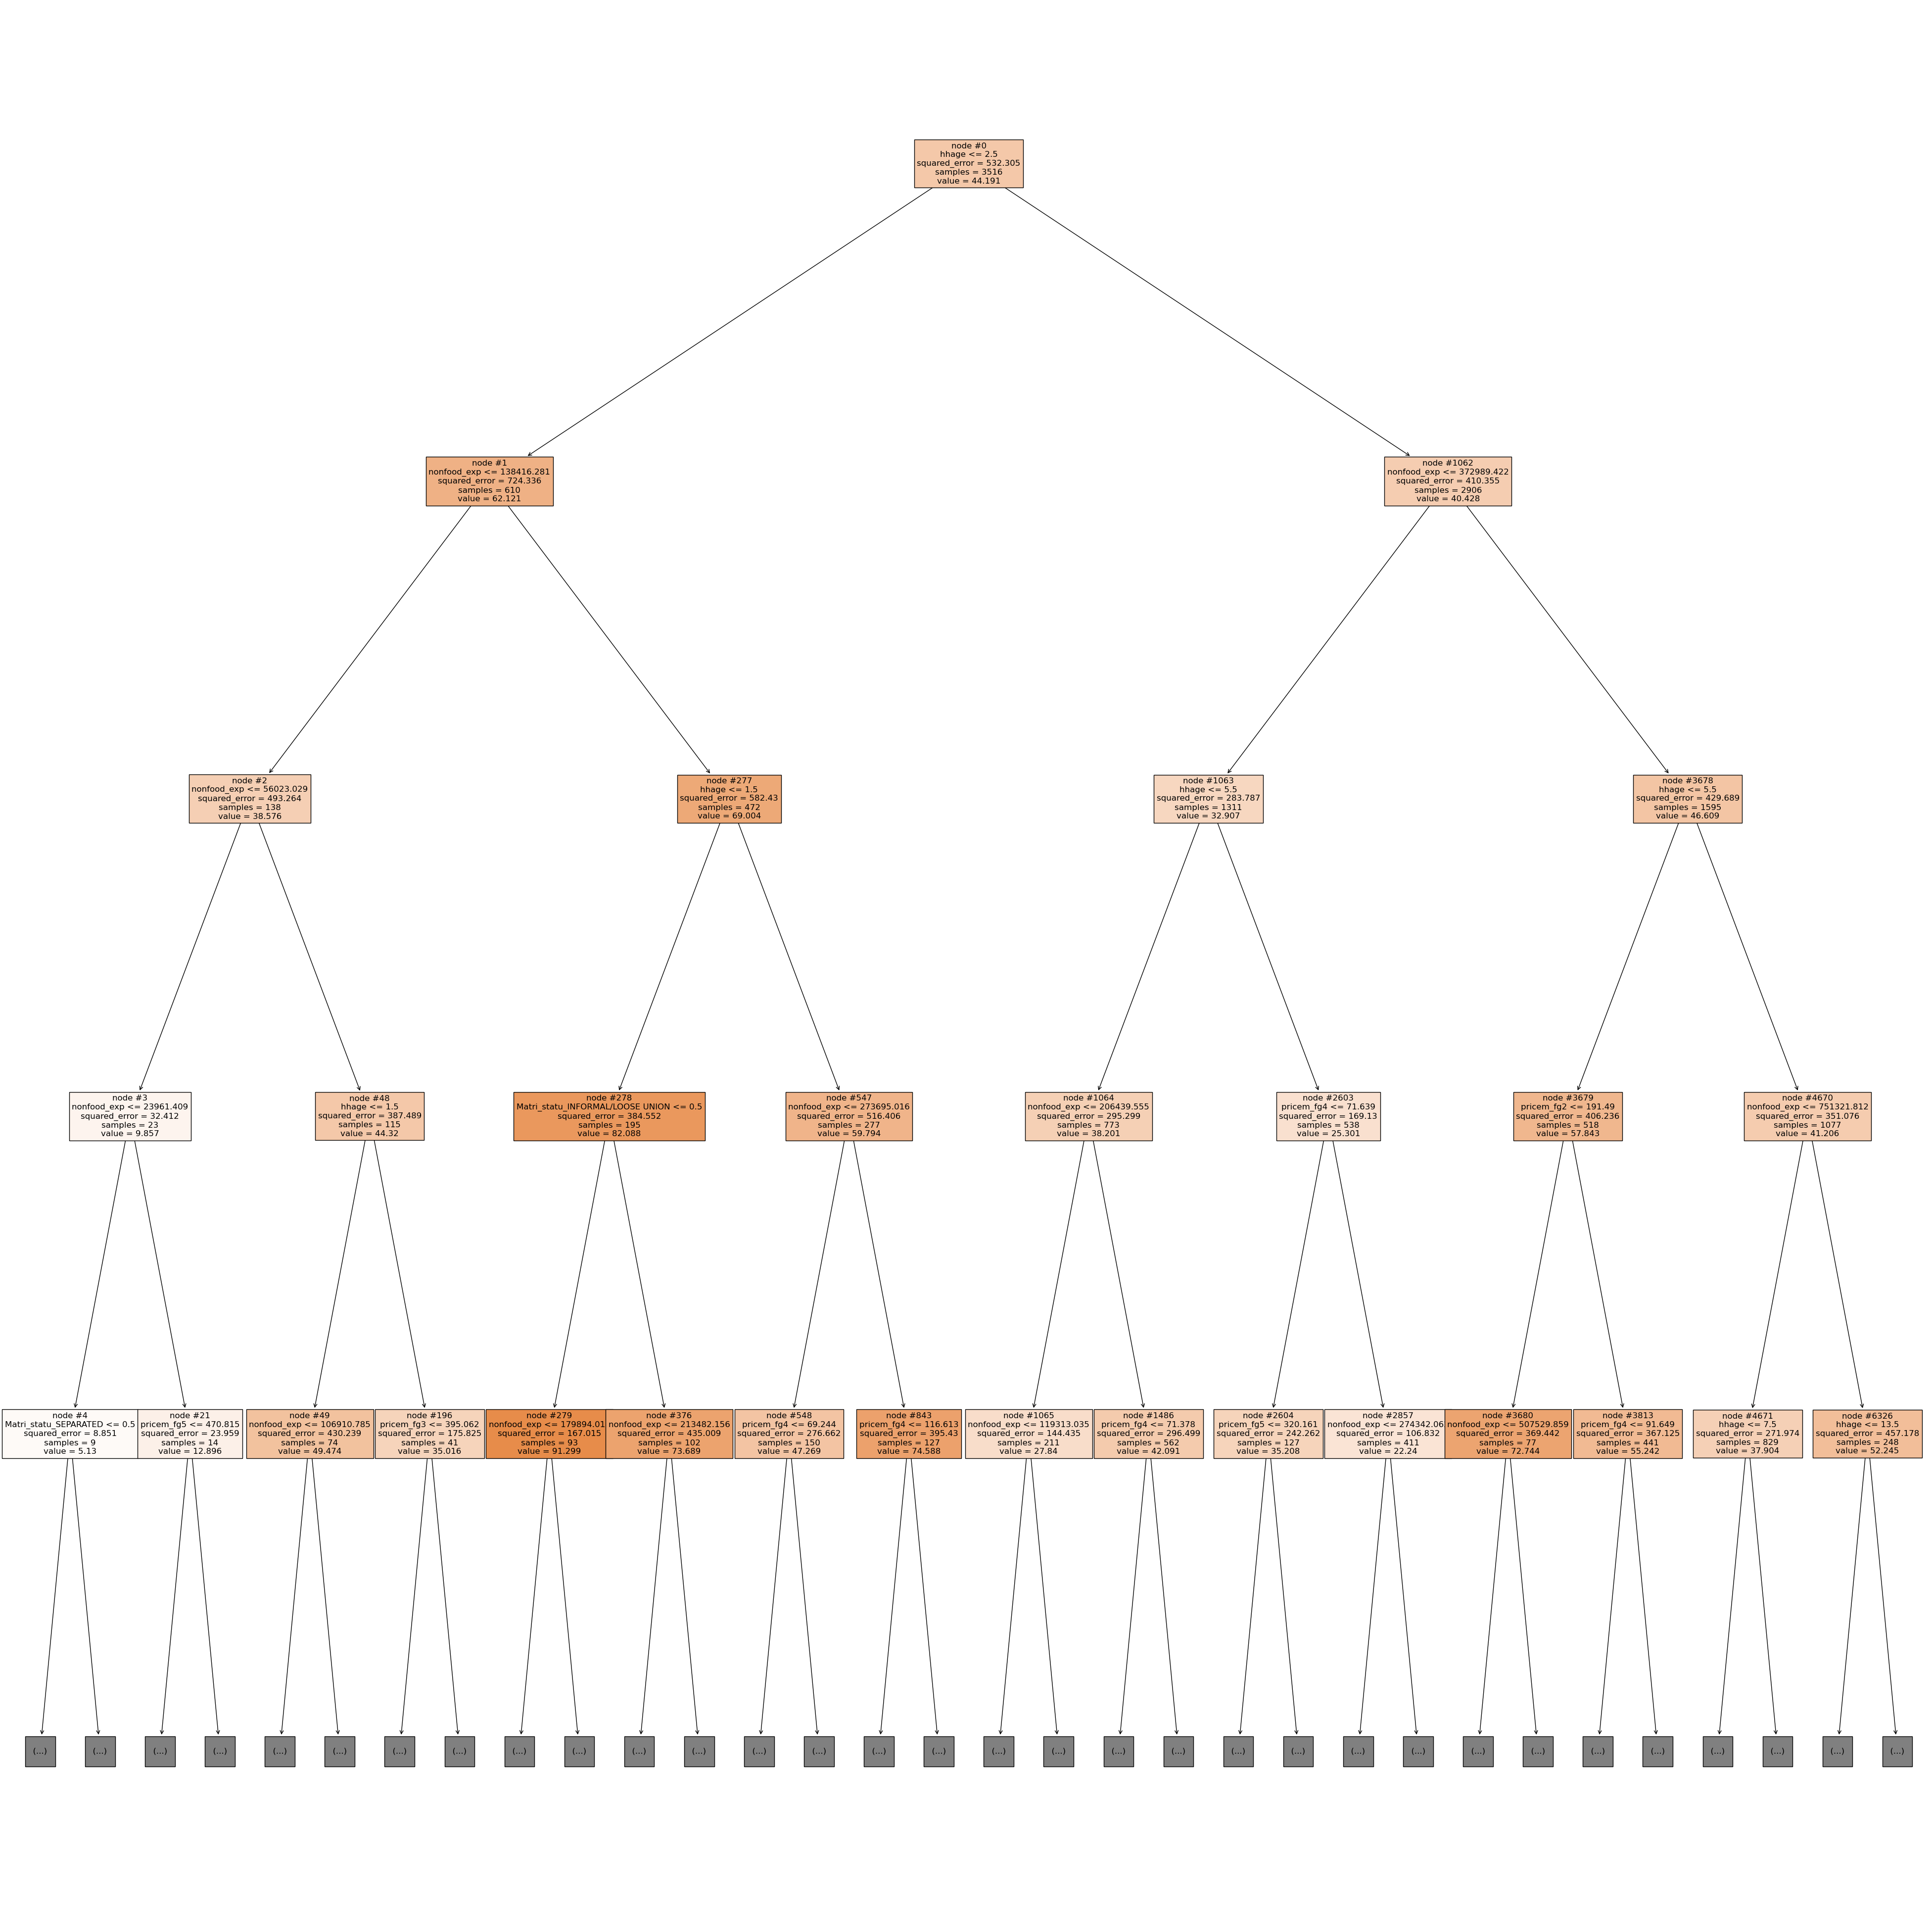

In [88]:
X1 = data.drop(columns = {'HNA_cal'})
features = list(X1.columns)

plt.figure(figsize = (50, 50))
plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

In [74]:
importances = dt.feature_importances_
columns = X1.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (20, 20))
sns.barplot(importance_df.Importance,importance_df.index)

ValueError: Shape of passed values is (37, 1), indices imply (36, 1)

### Building Random Forest

In [57]:
# Importing random forest regressor usinf sklearn

from sklearn.ensemble import RandomForestRegressor

In [58]:
# Defining the Random forest regressor
rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2)

# Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model. 

# Fitting the model
rf.fit(x_train1,y_train)

RandomForestRegressor(max_depth=4, n_estimators=200)

In [59]:
model_pref(rf, x_train1, x_test1, y_train, y_test) 

    Data       RMSE        MAE       MAPE
0  Train  15.763787  12.089194  35.274471
1   Test  16.827492  12.739198  35.604513


In [60]:
importances = rf.feature_importances_
columns = X1.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (20, 20))
sns.barplot(importance_df.Importance, importance_df.index)

ValueError: Shape of passed values is (37, 1), indices imply (36, 1)